<a href="https://colab.research.google.com/github/ravi-gopalan/ipl_analysis/blob/master/ipl_analysis_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls -la

total 16
drwxr-xr-x 1 root root 4096 May 31 16:17 .
drwxr-xr-x 1 root root 4096 Jun 15 12:05 ..
drwxr-xr-x 1 root root 4096 Jun 12 16:04 .config
drwxr-xr-x 1 root root 4096 May 31 16:17 sample_data


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
cd /content

/content


In [0]:
!mkdir ipl

In [5]:
cd /content/ipl

/content/ipl


In [6]:
cd /root

/root


In [0]:
!mkdir .kaggle

In [0]:
!cp '/content/gdrive/My Drive/Colab_stuff/kaggle.json' /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [9]:
cd /content/ipl

/content/ipl


In [10]:
!kaggle datasets download -d ravijee/ipl-2008-to-2019 -p /content/ipl

  0% 0.00/4.18M [00:00<?, ?B/s]
100% 4.18M/4.18M [00:00<00:00, 38.4MB/s]


In [11]:
!ls -la

total 4288
drwxr-xr-x 2 root root    4096 Jun 15 12:06 .
drwxr-xr-x 1 root root    4096 Jun 15 12:06 ..
-rw-r--r-- 1 root root 4382601 Jun 15 12:06 ipl-2008-to-2019.zip


In [12]:
pwd

'/content/ipl'

In [0]:
!unzip -q /content/ipl/ipl-2008-to-2019.zip

In [14]:
!ls -la

total 66940
drwxr-xr-x 2 root root     4096 Jun 15 12:07 .
drwxr-xr-x 1 root root     4096 Jun 15 12:06 ..
---------- 1 root root 61907342 Jun 15 09:58 ball_by_ball_details.csv
-rw-r--r-- 1 root root  4382601 Jun 15 12:06 ipl-2008-to-2019.zip
---------- 1 root root   176133 Jun 15 09:58 ipl_summary.csv
---------- 1 root root  2060580 Jun 15 09:58 ipl.zip


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

import datetime as dt

In [0]:
base_dir = Path('/content/ipl')

In [0]:
df_match_summary = pd.read_csv('ipl_summary.csv')

In [18]:
df_match_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 21 columns):
match_id           756 non-null int64
by                 743 non-null object
city               743 non-null object
competition        756 non-null object
dates              756 non-null object
decision           756 non-null object
eliminator         9 non-null object
gender             756 non-null object
match_type         756 non-null object
method             19 non-null object
neutral_venue      77 non-null float64
overs              756 non-null int64
player_of_match    752 non-null object
result             13 non-null object
teams              756 non-null object
umpires            755 non-null object
venue              756 non-null object
winner             756 non-null object
winner_toss        743 non-null object
runs               337 non-null float64
wickets            406 non-null float64
dtypes: float64(3), int64(2), object(16)
memory usage: 124.1+ KB


In [0]:
df_match_summary = df_match_summary.set_index('match_id')

In [20]:
df_match_summary.head()

,by,city,competition,dates,decision,eliminator,gender,match_type,method,neutral_venue,overs,player_of_match,result,teams,umpires,venue,winner,winner_toss,runs,wickets
match_id,,,,,,,,,,,,,,,,,,,,
419128,{'runs': 17},Bangalore,IPL,['2010-03-25'],field,NaN,male,T20,NaN,NaN,20,['KM Jadhav'],NaN,"['Royal Challengers Bangalore', 'Delhi Daredev...","['BG Jerling', 'RE Koertzen']",M Chinnaswamy Stadium,Delhi Daredevils,Royal Challengers Bangalore,17.0,NaN
501223,{'runs': 29},Delhi,IPL,['2011-04-23'],field,NaN,male,T20,NaN,NaN,20,['DA Warner'],NaN,"['Delhi Daredevils', 'Kings XI Punjab']","['S Asnani', 'RE Koertzen']",Feroz Shah Kotla,Delhi Daredevils,Kings XI Punjab,29.0,NaN
501215,{'wickets': 7},Kochi,IPL,['2011-04-18'],field,NaN,male,T20,D/L,NaN,20,['BB McCullum'],NaN,"['Kochi Tuskers Kerala', 'Chennai Super Kings']","['K Hariharan', 'AL Hill']",Nehru Stadium,Kochi Tuskers Kerala,Kochi Tuskers Kerala,NaN,7.0
501246,{'runs': 32},Mumbai,IPL,['2011-05-07'],field,NaN,male,T20,NaN,NaN,20,['AT Rayudu'],NaN,"['Mumbai Indians', 'Delhi Daredevils']","['K Hariharan', 'SJA Taufel']",Wankhede Stadium,Mumbai Indians,Delhi Daredevils,32.0,NaN
548333,{'runs': 20},Delhi,IPL,['2012-04-21'],field,NaN,male,T20,NaN,NaN,20,['SC Ganguly'],NaN,"['Delhi Daredevils', 'Pune Warriors']","['Asad Rauf', 'S Das']",Feroz Shah Kotla,Pune Warriors,Delhi Daredevils,20.0,NaN


In [0]:
df_match_summary['match_date'] = pd.to_datetime(df_match_summary['dates'].str[2:12])

In [22]:
df_match_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 419128 to 829785
Data columns (total 21 columns):
by                 743 non-null object
city               743 non-null object
competition        756 non-null object
dates              756 non-null object
decision           756 non-null object
eliminator         9 non-null object
gender             756 non-null object
match_type         756 non-null object
method             19 non-null object
neutral_venue      77 non-null float64
overs              756 non-null int64
player_of_match    752 non-null object
result             13 non-null object
teams              756 non-null object
umpires            755 non-null object
venue              756 non-null object
winner             756 non-null object
winner_toss        743 non-null object
runs               337 non-null float64
wickets            406 non-null float64
match_date         756 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(16)
mem

In [0]:
df_match_summary['player_of_match'] = df_match_summary['player_of_match'].str[2:-2]
df_match_summary.drop(['by','dates'], axis=1, inplace=True)
df_match_summary.rename(columns={'decision':'toss_decision'}, inplace=True)

In [24]:
df_teams = pd.DataFrame(df_match_summary.teams.str.split(',',n=2,expand=True))
df_teams.rename(columns={0:'team_1',1:'team_2'},inplace=True)
df_teams.team_1 = df_teams.team_1.str[2:-1] 
df_teams.team_2 = df_teams.team_2.str[2:-2] 
df_teams.head()

,team_1,team_2
match_id,,
419128,Royal Challengers Bangalore,Delhi Daredevils
501223,Delhi Daredevils,Kings XI Punjab
501215,Kochi Tuskers Kerala,Chennai Super Kings
501246,Mumbai Indians,Delhi Daredevils
548333,Delhi Daredevils,Pune Warriors


In [25]:
df_umpires = pd.DataFrame(df_match_summary.umpires.str.split(',',n=4,expand=True))
df_umpires.rename(columns={0:'umpire_1',1:'umpire_2',2:'umpire_3',3:'umpire_4'},inplace=True)
df_umpires.umpire_1 = df_umpires.umpire_1.str[2:-1] 
df_umpires.umpire_2 = df_umpires.umpire_2.str[2:-2]
df_umpires.umpire_3 = df_umpires.umpire_3.str[2:-2]
df_umpires.umpire_4 = df_umpires.umpire_4.str[2:-2]

df_umpires.head()

,umpire_1,umpire_2,umpire_3,umpire_4
match_id,,,,
419128,BG Jerling,RE Koertzen,None,None
501223,S Asnani,RE Koertzen,None,None
501215,K Hariharan,AL Hill,None,None
501246,K Hariharan,SJA Taufel,None,None
548333,Asad Rauf,S Das,None,None


In [0]:
df_match_summary = df_match_summary.join(df_teams) 
df_match_summary = df_match_summary.join(df_umpires) 
df_match_summary.drop(['teams','umpires'], axis=1, inplace=True)
df_match_summary.rename(columns={'runs':'won_by_runs','wickets':'won_by_wickets'}, inplace=True)

Map team names to abbreviations and standardize names

In [0]:
team_names = {'Rajasthan Royals':'RR',\
              'Mumbai Indians' : 'MI',\
              'Delhi Daredevils':'DD',\
              'Kolkata Knight Riders':'KKR',\
              'Kings XI Punjab':'KXP',\
              'Sunrisers Hyderabad':'SRH',\
              'Deccan Chargers':'DC-Chargers',\
              'Chennai Super Kings':'CSK',\
              'Rising Pune Supergiants':'RPS',\
              'Royal Challengers Bangalore':'RCB',\
              'Pune Warriors':'PW',\
              'Gujarat Lions':'GL',\
              'Delhi Capitals':'DC-Capitals',\
              'Rising Pune Supergiant':'RPS',\
              'Kochi Tuskers Kerala':'KTK'
             }

In [0]:
df_match_summary['winner_toss'] = df_match_summary['winner_toss'].map(team_names)

In [0]:
df_match_summary['winner'] = df_match_summary['winner'].map(team_names)
df_match_summary['team_1'] = df_match_summary['team_1'].map(team_names)
df_match_summary['team_2'] = df_match_summary['team_2'].map(team_names)

In [0]:
df_match_summary['season'] = df_match_summary['match_date'].dt.year

In [31]:
df_match_summary.head()

,city,competition,toss_decision,eliminator,gender,match_type,method,neutral_venue,overs,player_of_match,result,venue,winner,winner_toss,won_by_runs,won_by_wickets,match_date,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4,season
match_id,,,,,,,,,,,,,,,,,,,,,,,,
419128,Bangalore,IPL,field,NaN,male,T20,NaN,NaN,20,KM Jadhav,NaN,M Chinnaswamy Stadium,DD,RCB,17.0,NaN,2010-03-25,RCB,DD,BG Jerling,RE Koertzen,None,None,2010
501223,Delhi,IPL,field,NaN,male,T20,NaN,NaN,20,DA Warner,NaN,Feroz Shah Kotla,DD,KXP,29.0,NaN,2011-04-23,DD,KXP,S Asnani,RE Koertzen,None,None,2011
501215,Kochi,IPL,field,NaN,male,T20,D/L,NaN,20,BB McCullum,NaN,Nehru Stadium,KTK,KTK,NaN,7.0,2011-04-18,KTK,CSK,K Hariharan,AL Hill,None,None,2011
501246,Mumbai,IPL,field,NaN,male,T20,NaN,NaN,20,AT Rayudu,NaN,Wankhede Stadium,MI,DD,32.0,NaN,2011-05-07,MI,DD,K Hariharan,SJA Taufel,None,None,2011
548333,Delhi,IPL,field,NaN,male,T20,NaN,NaN,20,SC Ganguly,NaN,Feroz Shah Kotla,PW,DD,20.0,NaN,2012-04-21,DD,PW,Asad Rauf,S Das,None,None,2012


In [0]:
df_match_summary.to_csv('match_summary.csv')

In [33]:
df_details = pd.read_csv('ball_by_ball_details.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (30,33,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df_details = df_details.drop(columns=['by','competition','dates','decision','eliminator','gender','match_type','neutral_venue',\
                                      'overs','player_of_match','city','result','teams','umpires','winner','winner_toss','runs',\
                                      'wickets','match_date','season','venue'])

In [0]:
df_details['batting_team'] = df_details['batting_team'].map(team_names)

In [36]:
df_details.head()

,Unnamed: 0,0,0_extras,0_wickets,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,fielders,kind,legbyes,level_0,level_1,match_id,noballs,non_boundary,non_striker,player_out,total,wides,0.1,extras,penalty,method,over
0,0,NaN,NaN,NaN,DA Warner,2.0,DD,P Kumar,NaN,0.0,NaN,NaN,NaN,inning_1,0.1,419128,NaN,NaN,V Sehwag,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1
1,1,NaN,NaN,NaN,DA Warner,2.0,DD,P Kumar,NaN,0.0,NaN,NaN,NaN,inning_1,0.2,419128,NaN,NaN,V Sehwag,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1
2,2,NaN,NaN,NaN,DA Warner,2.0,DD,P Kumar,NaN,0.0,NaN,NaN,NaN,inning_1,0.3,419128,NaN,NaN,V Sehwag,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1
3,3,NaN,NaN,NaN,DA Warner,0.0,DD,P Kumar,NaN,0.0,NaN,NaN,NaN,inning_1,0.4,419128,NaN,NaN,V Sehwag,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1
4,4,NaN,NaN,NaN,DA Warner,6.0,DD,P Kumar,NaN,0.0,NaN,NaN,NaN,inning_1,0.5,419128,NaN,NaN,V Sehwag,NaN,6.0,NaN,NaN,NaN,NaN,NaN,1


In [0]:
df_details['wides'] = df_details['wides'].astype('float')
df_details['noballs'] = df_details['noballs'].astype('float')
df_details['legbyes'] = df_details['legbyes'].astype('float')
df_details['byes'] = df_details['byes'].astype('float')


In [38]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178949 entries, 0 to 178948
Data columns (total 27 columns):
Unnamed: 0      178949 non-null int64
0               0 non-null float64
0_extras        0 non-null float64
0_wickets       0 non-null float64
batsman         178940 non-null object
batsman_runs    178940 non-null float64
batting_team    178949 non-null object
bowler          178940 non-null object
byes            480 non-null float64
extras_runs     178299 non-null float64
fielders        6338 non-null object
kind            8827 non-null object
legbyes         2933 non-null float64
level_0         178949 non-null object
level_1         178949 non-null float64
match_id        178949 non-null int64
noballs         712 non-null float64
non_boundary    14 non-null float64
non_striker     178940 non-null object
player_out      8827 non-null object
total           178940 non-null float64
wides           5405 non-null float64
0.1             0 non-null float64
extras          641 n

In [39]:
df_fielders = pd.DataFrame(df_details.fielders.str.split(',',n=2,expand=True))


df_fielders.rename(columns={0:'fielder_1',1:'fielder_2',2:'fielder_3'},inplace=True)
df_fielders.head()


,fielder_1,fielder_2,fielder_3
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [40]:
df_fielders[df_fielders['fielder_1'].notnull() & df_fielders['fielder_2'].notnull() & df_fielders['fielder_3'].notnull()]


,fielder_1,fielder_2,fielder_3
5811,['LJ Wright','RV Uthappa','AD Mathews']
20573,['SR Watson','JP Faulkner','DH Yagnik']
26486,['Joginder Sharma','JDP Oram','MS Dhoni']
36393,['AA Jhunjhunwala','FY Fazal','NV Ojha']
50885,['STR Binny','Sachin Baby','KK Cooper']
63999,['TM Srivastava','DPMD Jayawardene','U Kaul']
70172,['SK Raina','RA Jadeja','MM Sharma']
79669,['Z Khan','KK Nair','Q de Kock']
80251,['M Vijay','MS Dhoni','JA Morkel']
138365,['P Negi','CH Morris','Q de Kock']


In [0]:
df_fielders['fielder_1'] = df_fielders['fielder_1'].str.replace(r"\[","")
df_fielders['fielder_2'] = df_fielders['fielder_2'].str.replace(r"\[","")
df_fielders['fielder_3'] = df_fielders['fielder_3'].str.replace(r"\[","")
df_fielders['fielder_1'] = df_fielders['fielder_1'].str.replace(r"\]","")
df_fielders['fielder_2'] = df_fielders['fielder_2'].str.replace(r"\]","")
df_fielders['fielder_3'] = df_fielders['fielder_3'].str.replace(r"\]","")


df_fielders['fielder_1'] = df_fielders['fielder_1'].str.replace(r"\'","")
df_fielders['fielder_2'] = df_fielders['fielder_2'].str.replace(r"\'","")
df_fielders['fielder_3'] = df_fielders['fielder_3'].str.replace(r"\'","")

In [42]:
print(df_fielders[df_fielders['fielder_1'].notnull() & df_fielders['fielder_2'].notnull() & df_fielders['fielder_3'].notnull()].head(5))
print(df_fielders[df_fielders['fielder_1'].notnull()].head(5))

             fielder_1     fielder_2    fielder_3
5811         LJ Wright    RV Uthappa   AD Mathews
20573        SR Watson   JP Faulkner    DH Yagnik
26486  Joginder Sharma      JDP Oram     MS Dhoni
36393  AA Jhunjhunwala      FY Fazal      NV Ojha
50885        STR Binny   Sachin Baby    KK Cooper
         fielder_1    fielder_2 fielder_3
20   R Vinay Kumar         None      None
31         V Kohli         None      None
71        DW Steyn         None      None
99      EJG Morgan         None      None
193       UT Yadav   KD Karthik      None


In [43]:
df_fielders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178949 entries, 0 to 178948
Data columns (total 3 columns):
fielder_1    6338 non-null object
fielder_2    391 non-null object
fielder_3    11 non-null object
dtypes: object(3)
memory usage: 4.1+ MB


In [44]:
df_details = df_details.join(df_fielders)
df_details.drop(['fielders'], axis=1, inplace=True)
df_details.head()

,Unnamed: 0,0,0_extras,0_wickets,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_boundary,non_striker,player_out,total,wides,0.1,extras,penalty,method,over,fielder_1,fielder_2,fielder_3
0,0,NaN,NaN,NaN,DA Warner,2.0,DD,P Kumar,NaN,0.0,NaN,NaN,inning_1,0.1,419128,NaN,NaN,V Sehwag,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
1,1,NaN,NaN,NaN,DA Warner,2.0,DD,P Kumar,NaN,0.0,NaN,NaN,inning_1,0.2,419128,NaN,NaN,V Sehwag,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
2,2,NaN,NaN,NaN,DA Warner,2.0,DD,P Kumar,NaN,0.0,NaN,NaN,inning_1,0.3,419128,NaN,NaN,V Sehwag,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
3,3,NaN,NaN,NaN,DA Warner,0.0,DD,P Kumar,NaN,0.0,NaN,NaN,inning_1,0.4,419128,NaN,NaN,V Sehwag,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
4,4,NaN,NaN,NaN,DA Warner,6.0,DD,P Kumar,NaN,0.0,NaN,NaN,inning_1,0.5,419128,NaN,NaN,V Sehwag,NaN,6.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN


In [45]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178949 entries, 0 to 178948
Data columns (total 29 columns):
Unnamed: 0      178949 non-null int64
0               0 non-null float64
0_extras        0 non-null float64
0_wickets       0 non-null float64
batsman         178940 non-null object
batsman_runs    178940 non-null float64
batting_team    178949 non-null object
bowler          178940 non-null object
byes            480 non-null float64
extras_runs     178299 non-null float64
kind            8827 non-null object
legbyes         2933 non-null float64
level_0         178949 non-null object
level_1         178949 non-null float64
match_id        178949 non-null int64
noballs         712 non-null float64
non_boundary    14 non-null float64
non_striker     178940 non-null object
player_out      8827 non-null object
total           178940 non-null float64
wides           5405 non-null float64
0.1             0 non-null float64
extras          641 non-null float64
penalty         2 non

In [0]:
df_details['level_1'] = df_details['level_1'].astype(str)

In [0]:
delivery = {'0.1': '1','0.2': '2', '0.3': '3', '0.4': '4', '0.5': '5', '0.6': '6', '0.7': '7', '0.8': '8', '0.9': '9',\
         '1.1': '1','1.2': '2', '1.3': '3', '1.4': '4', '1.5': '5', '1.6': '6', '1.7': '7', '1.8': '8', '1.9': '9',\
         '2.1': '1','2.2': '2', '2.3': '3', '2.4': '4', '2.5': '5', '2.6': '6', '2.7': '7', '2.8': '8', '2.9': '9',\
         '3.1': '1','3.2': '2', '3.3': '3', '3.4': '4', '3.5': '5', '3.6': '6', '3.7': '7', '3.8': '8', '3.9': '9',\
         '4.1': '1','4.2': '2', '4.3': '3', '4.4': '4', '4.5': '5', '4.6': '6', '4.7': '7', '4.8': '8', '4.9': '9',\
         '5.1': '1','5.2': '2', '5.3': '3', '5.4': '4', '5.5': '5', '5.6': '6', '5.7': '7', '5.8': '8', '5.9': '9',\
         '6.1': '1','6.2': '2', '6.3': '3', '6.4': '4', '6.5': '5', '6.6': '6', '6.7': '7', '6.8': '8', '6.9': '9',\
         '7.1': '1','7.2': '2', '7.3': '3', '7.4': '4', '7.5': '5', '7.6': '6', '7.7': '7', '7.8': '8', '7.9': '9',\
         '8.1': '1','8.2': '2', '8.3': '3', '8.4': '4', '8.5': '5', '8.6': '6', '8.7': '7', '8.8': '8', '8.9': '9',\
         '9.1': '1','9.2': '2', '9.3': '3', '9.4': '4', '9.5': '5', '9.6': '6', '9.7': '7', '9.8': '8', '9.9': '9',\
         '10.1': '1','10.2': '2', '10.3': '3', '10.4': '4', '10.5': '5', '10.6': '6', '10.7': '7', '10.8': '8', '10.9': '9',\
         '11.1': '1','11.2': '2', '11.3': '3', '11.4': '4', '11.5': '5', '11.6': '6', '11.7': '7', '11.8': '8', '11.9': '9',\
         '12.1': '1','12.2': '2', '12.3': '3', '12.4': '4', '12.5': '5', '12.6': '6', '12.7': '7', '12.8': '8', '12.9': '9',\
         '13.1': '1','13.2': '2', '13.3': '3', '13.4': '4', '13.5': '5', '13.6': '6', '13.7': '7', '13.8': '8', '13.9': '9',\
         '14.1': '1','14.2': '2', '14.3': '3', '14.4': '4', '14.5': '5', '14.6': '6', '14.7': '7', '14.8': '8', '14.9': '9',\
         '15.1': '1','15.2': '2', '15.3': '3', '15.4': '4', '15.5': '5', '15.6': '6', '15.7': '7', '15.8': '8', '15.9': '9',\
         '16.1': '1','16.2': '2', '16.3': '3', '16.4': '4', '16.5': '5', '16.6': '6', '16.7': '7', '16.8': '8', '16.9': '9',\
         '17.1': '1','17.2': '2', '17.3': '3', '17.4': '4', '17.5': '5', '17.6': '6', '17.7': '7', '17.8': '8', '17.9': '9',\
         '18.1': '1','18.2': '2', '18.3': '3', '18.4': '4', '18.5': '5', '18.6': '6', '18.7': '7', '18.8': '8', '18.9': '9',\
         '19.1': '1','19.2': '2', '19.3': '3', '19.4': '4', '19.5': '5', '19.6': '6', '19.7': '7', '19.8': '8', '19.9': '9',\
        }

In [0]:
df_details['delivery'] = df_details['level_1'].map(delivery)

In [0]:
df_details['over'] = df_details['over'].astype(str)
inning_quarter = {'1': 'Q1','2': 'Q1', '3': 'Q1', '4': 'Q1', '5': 'Q1', \
                '6': 'Q2', '7': 'Q2', '8': 'Q2', '9': 'Q2', '10': 'Q2',\
                '11': 'Q3','12': 'Q3', '13': 'Q3', '14': 'Q3', '15': 'Q3',\
                '16': 'Q4', '17': 'Q4', '18': 'Q4', '19': 'Q4', '20': 'Q4'\
                }
df_details['inning_quarter'] = df_details['over'].map(inning_quarter)

In [50]:
df_details.head()

,Unnamed: 0,0,0_extras,0_wickets,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_boundary,non_striker,player_out,total,wides,0.1,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery,inning_quarter
0,0,NaN,NaN,NaN,DA Warner,2.0,DD,P Kumar,NaN,0.0,NaN,NaN,inning_1,0.1,419128,NaN,NaN,V Sehwag,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,Q1
1,1,NaN,NaN,NaN,DA Warner,2.0,DD,P Kumar,NaN,0.0,NaN,NaN,inning_1,0.2,419128,NaN,NaN,V Sehwag,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2,Q1
2,2,NaN,NaN,NaN,DA Warner,2.0,DD,P Kumar,NaN,0.0,NaN,NaN,inning_1,0.3,419128,NaN,NaN,V Sehwag,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,3,Q1
3,3,NaN,NaN,NaN,DA Warner,0.0,DD,P Kumar,NaN,0.0,NaN,NaN,inning_1,0.4,419128,NaN,NaN,V Sehwag,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4,Q1
4,4,NaN,NaN,NaN,DA Warner,6.0,DD,P Kumar,NaN,0.0,NaN,NaN,inning_1,0.5,419128,NaN,NaN,V Sehwag,NaN,6.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,5,Q1


In [51]:
df_details[df_details.player_out.notna()].head()

,Unnamed: 0,0,0_extras,0_wickets,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_boundary,non_striker,player_out,total,wides,0.1,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery,inning_quarter
20,20,NaN,NaN,NaN,DA Warner,0.0,DD,DW Steyn,NaN,0.0,caught,NaN,inning_1,3.3,419128,NaN,NaN,V Sehwag,DA Warner,0.0,NaN,NaN,NaN,NaN,NaN,4,R Vinay Kumar,None,None,3,Q1
31,31,NaN,NaN,NaN,V Sehwag,0.0,DD,R Vinay Kumar,NaN,0.0,caught,NaN,inning_1,5.1,419128,NaN,NaN,AB de Villiers,V Sehwag,0.0,NaN,NaN,NaN,NaN,NaN,6,V Kohli,None,None,1,Q2
71,71,NaN,NaN,NaN,AB de Villiers,0.0,DD,DW Steyn,NaN,0.0,run out,NaN,inning_1,11.4,419128,NaN,NaN,KD Karthik,KD Karthik,0.0,NaN,NaN,NaN,NaN,NaN,12,DW Steyn,None,None,4,Q3
99,99,NaN,NaN,NaN,KM Jadhav,0.0,DD,P Kumar,NaN,0.0,run out,NaN,inning_1,16.1,419128,NaN,NaN,AB de Villiers,AB de Villiers,0.0,NaN,NaN,NaN,NaN,NaN,17,EJG Morgan,None,None,1,Q4
184,184,NaN,NaN,NaN,JH Kallis,0.0,RCB,A Mishra,NaN,0.0,bowled,NaN,inning_2,9.1,419128,NaN,NaN,MK Pandey,JH Kallis,0.0,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,1,Q2


In [52]:
df_details['kind'].unique()

array([nan, 'caught', 'run out', 'bowled', 'lbw', 'caught and bowled',
       'stumped', 'hit wicket', 'obstructing the field', 'retired hurt'],
      dtype=object)

In [0]:
def attribute_catch (row):
  if row['kind'] == 'caught':
    value = row['fielder_1']
  elif row['kind'] == 'caught and bowled':
    value = row['bowler']
  else:
    value = None
  return value

df_details['catch_attributed_to'] = df_details.apply (lambda row: attribute_catch(row), axis=1)

In [0]:
def attribute_wicket (row):
    if row['kind'] == 'caught':
      value = row['bowler']
    elif row['kind'] == 'lbw':
      value = row['bowler']
    elif row['kind'] == 'stumped':
      value = row['bowler']
    elif row['kind'] == 'bowled':
      value = row['bowler']
    elif row['kind'] == 'hit wicket':
      value = row['bowler']
    elif row['kind'] == 'caught and bowled':
      value = row['bowler']
    else:
      value = None
    return value
  
df_details['wicket_attributed_to'] = df_details.apply( lambda row: attribute_wicket(row), axis = 1)

In [55]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178949 entries, 0 to 178948
Data columns (total 33 columns):
Unnamed: 0              178949 non-null int64
0                       0 non-null float64
0_extras                0 non-null float64
0_wickets               0 non-null float64
batsman                 178940 non-null object
batsman_runs            178940 non-null float64
batting_team            178949 non-null object
bowler                  178940 non-null object
byes                    480 non-null float64
extras_runs             178299 non-null float64
kind                    8827 non-null object
legbyes                 2933 non-null float64
level_0                 178949 non-null object
level_1                 178949 non-null object
match_id                178949 non-null int64
noballs                 712 non-null float64
non_boundary            14 non-null float64
non_striker             178940 non-null object
player_out              8827 non-null object
total               

In [56]:
df_details['wicket_attributed_to'].value_counts()


SL Malinga           170
A Mishra             157
Harbhajan Singh      150
PP Chawla            150
DJ Bravo             147
B Kumar              133
R Ashwin             125
SP Narine            122
UT Yadav             119
RA Jadeja            108
A Nehra              106
R Vinay Kumar        105
Z Khan               102
YS Chahal            100
DW Steyn              96
Sandeep Sharma        95
SR Watson             92
MM Sharma             91
RP Singh              90
P Kumar               90
PP Ojha               89
DS Kulkarni           86
JA Morkel             85
JJ Bumrah             82
IK Pathan             80
Imran Tahir           79
JD Unadkat            77
M Morkel              77
L Balaji              76
MM Patel              74
                    ... 
Harmeet Singh (2)      1
AA Jhunjhunwala        1
A Nel                  1
GS Sandhu              1
LMP Simmons            1
AJ Finch               1
BMAJ Mendis            1
AC Gilchrist           1
GR Napier              1


In [57]:
df_details.query('kind == "caught and bowled"').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 1152 to 178948
Data columns (total 33 columns):
Unnamed: 0              254 non-null int64
0                       0 non-null float64
0_extras                0 non-null float64
0_wickets               0 non-null float64
batsman                 254 non-null object
batsman_runs            254 non-null float64
batting_team            254 non-null object
bowler                  254 non-null object
byes                    0 non-null float64
extras_runs             254 non-null float64
kind                    254 non-null object
legbyes                 0 non-null float64
level_0                 254 non-null object
level_1                 254 non-null object
match_id                254 non-null int64
noballs                 0 non-null float64
non_boundary            0 non-null float64
non_striker             254 non-null object
player_out              254 non-null object
total                   254 non-null float64
wides          

In [58]:
df_details.query('kind == "caught"')['fielder_1']

20                R Vinay Kumar
31                      V Kohli
201                  KD Karthik
224                    V Sehwag
235              AB de Villiers
325                  KD Karthik
340                   RJ Harris
351                   RJ Harris
358                  KD Karthik
400                     Y Nagar
452                    V Sehwag
471                    V Sehwag
486                    V Sehwag
495                    JR Hopes
515                    PA Patel
631                  S Anirudha
668                   JA Morkel
683                  S Anirudha
740                    V Sehwag
797             Y Venugopal Rao
813                    V Sehwag
833                   RG Sharma
838                   AT Rayudu
925                    MM Patel
945                   A Symonds
946                    MM Patel
970                     NV Ojha
1041                   UT Yadav
1089                  SPD Smith
1149                   JD Ryder
                  ...          
177991  

In [59]:
df_details.head()

,Unnamed: 0,0,0_extras,0_wickets,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_boundary,non_striker,player_out,total,wides,0.1,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery,inning_quarter,catch_attributed_to,wicket_attributed_to
0,0,NaN,NaN,NaN,DA Warner,2.0,DD,P Kumar,NaN,0.0,NaN,NaN,inning_1,0.1,419128,NaN,NaN,V Sehwag,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,Q1,None,None
1,1,NaN,NaN,NaN,DA Warner,2.0,DD,P Kumar,NaN,0.0,NaN,NaN,inning_1,0.2,419128,NaN,NaN,V Sehwag,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2,Q1,None,None
2,2,NaN,NaN,NaN,DA Warner,2.0,DD,P Kumar,NaN,0.0,NaN,NaN,inning_1,0.3,419128,NaN,NaN,V Sehwag,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,3,Q1,None,None
3,3,NaN,NaN,NaN,DA Warner,0.0,DD,P Kumar,NaN,0.0,NaN,NaN,inning_1,0.4,419128,NaN,NaN,V Sehwag,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4,Q1,None,None
4,4,NaN,NaN,NaN,DA Warner,6.0,DD,P Kumar,NaN,0.0,NaN,NaN,inning_1,0.5,419128,NaN,NaN,V Sehwag,NaN,6.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,5,Q1,None,None


In [60]:
df_details['batsman_runs'][df_details['batsman_runs'] == 6.0].count()

8166

In [0]:
def flag_boundary_4 (row):
    if row['batsman_runs'] == 4.0:
      value = 1
    else:
      value = None  
    return value

def flag_boundary_6 (row):
    if row['batsman_runs'] == 6.0:
      value = 1
    else:
      value = None  
    return value

def flag_dot_ball (row):
    if row['batsman_runs'] == 0.0:
      value = 1
    else:
      value = None  
    return value
  
  
def flag_1_run_ball (row):
    if row['batsman_runs'] == 1.0:
      value = 1
    else:
      value = None  
    return value
  
def flag_2_run_ball (row):
    if row['batsman_runs'] == 2.0:
      value = 1
    else:
      value = None  
    return value

def flag_3_run_ball (row):
    if row['batsman_runs'] == 3.0:
      value = 1
    else:
      value = None  
    return value
  
def flag_5_run_ball (row):
    if row['batsman_runs'] == 5.0:
      value = 1
    else:
      value = None  
    return value
  
  
df_details['4_flag'] = df_details.apply(lambda row: flag_boundary_4(row), axis=1)
df_details['6_flag'] = df_details.apply( lambda row: flag_boundary_6(row), axis = 1)
df_details['dot_ball_flag'] = df_details.apply( lambda row: flag_dot_ball(row), axis = 1)
df_details['1_run_flag'] = df_details.apply( lambda row: flag_1_run_ball(row), axis = 1)
df_details['2_run_flag'] = df_details.apply( lambda row: flag_2_run_ball(row), axis = 1)
df_details['3_run_flag'] = df_details.apply( lambda row: flag_3_run_ball(row), axis = 1)
df_details['5_run_flag'] = df_details.apply( lambda row: flag_5_run_ball(row), axis = 1)

In [62]:
df_details.kind.unique()

array([nan, 'caught', 'run out', 'bowled', 'lbw', 'caught and bowled',
       'stumped', 'hit wicket', 'obstructing the field', 'retired hurt'],
      dtype=object)

In [0]:
def flag_caught (row):
    if row['kind'] == 'caught':
      value = 1
    else:
      value = None  
    return value

def flag_lbw (row):
    if row['kind'] == 'lbw':
      value = 1
    else:
      value = None  
    return value

def flag_stumped (row):
    if row['kind'] == 'stumped':
      value = 1
    else:
      value = None  
    return value
  
  
def flag_bowled (row):
    if row['kind'] == 'bowled':
      value = 1
    else:
      value = None  
    return value
  
def flag_run_out (row):
    if row['kind'] == 'run out':
      value = 1
    else:
      value = None  
    return value

def flag_hit_wicket (row):
    if row['kind'] == 'hit wicket':
      value = 1
    else:
      value = None  
    return value
  
def flag_caught_and_bowled (row):
    if row['kind'] == 'caught and bowled':
      value = 1
    else:
      value = None  
    return value

def flag_retired_hurt (row):
    if row['kind'] == 'retired hurt':
      value = 1
    else:
      value = None  
    return value

def flag_obstructing_the_field (row):
    if row['kind'] == 'obstructing the field':
      value = 1
    else:
      value = None  
    return value  

  
df_details['caught_flag'] = df_details.apply(lambda row: flag_caught(row), axis=1)
df_details['lbw_flag'] = df_details.apply( lambda row: flag_lbw(row), axis = 1)
df_details['stumped_flag'] = df_details.apply( lambda row: flag_stumped(row), axis = 1)
df_details['bowled_flag'] = df_details.apply( lambda row: flag_bowled(row), axis = 1)
df_details['run_out_flag'] = df_details.apply( lambda row: flag_run_out(row), axis = 1)
df_details['hit_wicket_flag'] = df_details.apply( lambda row: flag_hit_wicket(row), axis = 1)
df_details['caught_and_bowled_flag'] = df_details.apply( lambda row: flag_caught_and_bowled(row), axis = 1)
df_details['retired_hurt_flag'] = df_details.apply( lambda row: flag_retired_hurt(row), axis = 1)
df_details['obstructing_the_field_flag'] = df_details.apply( lambda row: flag_obstructing_the_field(row), axis = 1)

In [64]:
df_details[df_details['wides'].notna()].head()

,Unnamed: 0,0,0_extras,0_wickets,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_boundary,non_striker,player_out,total,wides,0.1,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag
18,18,NaN,NaN,NaN,DA Warner,0.0,DD,DW Steyn,NaN,1.0,NaN,NaN,inning_1,3.1,419128,NaN,NaN,V Sehwag,NaN,1.0,1.0,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,1,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,56,NaN,NaN,NaN,KD Karthik,0.0,DD,R Vinay Kumar,NaN,1.0,NaN,NaN,inning_1,9.2,419128,NaN,NaN,AB de Villiers,NaN,1.0,1.0,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,2,Q2,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,74,NaN,NaN,NaN,KM Jadhav,0.0,DD,JH Kallis,NaN,1.0,NaN,NaN,inning_1,12.1,419128,NaN,NaN,AB de Villiers,NaN,1.0,1.0,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,1,Q3,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,100,NaN,NaN,NaN,AB McDonald,0.0,DD,P Kumar,NaN,1.0,NaN,NaN,inning_1,16.2,419128,NaN,NaN,KM Jadhav,NaN,1.0,1.0,NaN,NaN,NaN,NaN,17,NaN,NaN,NaN,2,Q4,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,105,NaN,NaN,NaN,KM Jadhav,0.0,DD,P Kumar,NaN,1.0,NaN,NaN,inning_1,16.7,419128,NaN,NaN,AB McDonald,NaN,1.0,1.0,NaN,NaN,NaN,NaN,17,NaN,NaN,NaN,7,Q4,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df_details['wide_flag'] = df_details['wides'].notna()
df_details['noball_flag'] = df_details['noballs'].notna()
df_details['legbye_flag'] = df_details['legbyes'].notna()
df_details['bye_flag'] = df_details['byes'].notna()

In [66]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178949 entries, 0 to 178948
Data columns (total 53 columns):
Unnamed: 0                    178949 non-null int64
0                             0 non-null float64
0_extras                      0 non-null float64
0_wickets                     0 non-null float64
batsman                       178940 non-null object
batsman_runs                  178940 non-null float64
batting_team                  178949 non-null object
bowler                        178940 non-null object
byes                          480 non-null float64
extras_runs                   178299 non-null float64
kind                          8827 non-null object
legbyes                       2933 non-null float64
level_0                       178949 non-null object
level_1                       178949 non-null object
match_id                      178949 non-null int64
noballs                       712 non-null float64
non_boundary                  14 non-null float64
non_strike

In [0]:
df_details.drop(['0'], inplace=True, axis=1)

In [0]:
df_details.drop(['Unnamed: 0'], inplace=True, axis=1)

In [69]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178949 entries, 0 to 178948
Data columns (total 51 columns):
0_extras                      0 non-null float64
0_wickets                     0 non-null float64
batsman                       178940 non-null object
batsman_runs                  178940 non-null float64
batting_team                  178949 non-null object
bowler                        178940 non-null object
byes                          480 non-null float64
extras_runs                   178299 non-null float64
kind                          8827 non-null object
legbyes                       2933 non-null float64
level_0                       178949 non-null object
level_1                       178949 non-null object
match_id                      178949 non-null int64
noballs                       712 non-null float64
non_boundary                  14 non-null float64
non_striker                   178940 non-null object
player_out                    8827 non-null object
total  

In [70]:
df_details.head()

,0_extras,0_wickets,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_boundary,non_striker,player_out,total,wides,0.1,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag
0,NaN,NaN,DA Warner,2.0,DD,P Kumar,NaN,0.0,NaN,NaN,inning_1,0.1,419128,NaN,NaN,V Sehwag,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,Q1,None,None,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
1,NaN,NaN,DA Warner,2.0,DD,P Kumar,NaN,0.0,NaN,NaN,inning_1,0.2,419128,NaN,NaN,V Sehwag,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2,Q1,None,None,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
2,NaN,NaN,DA Warner,2.0,DD,P Kumar,NaN,0.0,NaN,NaN,inning_1,0.3,419128,NaN,NaN,V Sehwag,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,3,Q1,None,None,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
3,NaN,NaN,DA Warner,0.0,DD,P Kumar,NaN,0.0,NaN,NaN,inning_1,0.4,419128,NaN,NaN,V Sehwag,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
4,NaN,NaN,DA Warner,6.0,DD,P Kumar,NaN,0.0,NaN,NaN,inning_1,0.5,419128,NaN,NaN,V Sehwag,NaN,6.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,5,Q1,None,None,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False


In [0]:
df_not_out_check = df_details[['match_id','level_0','batsman','player_out','kind']].drop_duplicates()

In [72]:
df_not_out_check.query('kind=="run out"')

,match_id,level_0,batsman,player_out,kind
71,419128,inning_1,AB de Villiers,KD Karthik,run out
99,419128,inning_1,KM Jadhav,AB de Villiers,run out
193,419128,inning_2,R Dravid,R Dravid,run out
219,419128,inning_2,EJG Morgan,EJG Morgan,run out
232,419128,inning_2,V Kohli,R Vinay Kumar,run out
593,501215,inning_1,SK Raina,SK Raina,run out
924,501246,inning_2,JR Hopes,JR Hopes,run out
1161,548333,inning_2,LRPL Taylor,P Negi,run out
1455,1082634,inning_1,RA Tripathi,RA Tripathi,run out
1562,1082634,inning_1,MK Tiwary,MK Tiwary,run out


In [73]:
df_not_out_check.head(5)

,match_id,level_0,batsman,player_out,kind
0,419128,inning_1,DA Warner,NaN,NaN
8,419128,inning_1,V Sehwag,NaN,NaN
20,419128,inning_1,DA Warner,DA Warner,caught
23,419128,inning_1,AB de Villiers,NaN,NaN
31,419128,inning_1,V Sehwag,V Sehwag,caught


In [0]:
def check_out(row):
  if row['kind'] != 'NaN' and row['player_out'] == row['batsman']:
    value = row['batsman']
  elif row['kind'] !='NaN' and row['player_out'] != row['batsman']:
    value = row['player_out']
  else:
    value = None
  return value

df_not_out_check['out'] = df_not_out_check.apply(lambda row: check_out(row),axis=1)

In [75]:
df_not_out_check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19703 entries, 0 to 178948
Data columns (total 6 columns):
match_id      19703 non-null int64
level_0       19703 non-null object
batsman       19694 non-null object
player_out    8827 non-null object
kind          8827 non-null object
out           8827 non-null object
dtypes: int64(1), object(5)
memory usage: 1.1+ MB


In [76]:
df_not_out_check.query('kind=="run out"').head()

,match_id,level_0,batsman,player_out,kind,out
71,419128,inning_1,AB de Villiers,KD Karthik,run out,KD Karthik
99,419128,inning_1,KM Jadhav,AB de Villiers,run out,AB de Villiers
193,419128,inning_2,R Dravid,R Dravid,run out,R Dravid
219,419128,inning_2,EJG Morgan,EJG Morgan,run out,EJG Morgan
232,419128,inning_2,V Kohli,R Vinay Kumar,run out,R Vinay Kumar


In [0]:
df_not_out = df_not_out_check.groupby(['match_id','level_0','player_out'],as_index=False)['out'].count()

In [78]:
df_not_out.head()

,match_id,level_0,player_out,out
0,335982,inning_1,DJ Hussey,1
1,335982,inning_1,RT Ponting,1
2,335982,inning_1,SC Ganguly,1
3,335982,inning_2,AA Noffke,1
4,335982,inning_2,B Akhil,1


In [79]:
df_not_out.tail()

,match_id,level_0,player_out,out
8822,1181768,inning_2,F du Plessis,1
8823,1181768,inning_2,MS Dhoni,1
8824,1181768,inning_2,SK Raina,1
8825,1181768,inning_2,SN Thakur,1
8826,1181768,inning_2,SR Watson,1


In [80]:
df_not_out.player_out.nunique()

486

In [81]:
df_not_out.query('match_id=="336002"')

,match_id,level_0,player_out,out
236,336002,inning_1,AC Gilchrist,1
237,336002,inning_1,AS Yadav,1
238,336002,inning_1,DB Ravi Teja,1
239,336002,inning_1,HH Gibbs,1
240,336002,inning_1,LPC Silva,1
241,336002,inning_1,RG Sharma,1
242,336002,inning_1,RP Singh,1
243,336002,inning_1,SB Bangar,1
244,336002,inning_1,WPUJC Vaas,1
245,336002,inning_1,Y Venugopal Rao,1


In [82]:
df_details.query('match_id=="336002" & kind =="run out"')

,0_extras,0_wickets,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_boundary,non_striker,player_out,total,wides,0.1,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag
17859,NaN,NaN,AS Yadav,0.0,DC-Chargers,R Vinay Kumar,NaN,0.0,run out,NaN,inning_1,18.4,336002,NaN,NaN,SB Bangar,SB Bangar,0.0,NaN,NaN,NaN,NaN,NaN,19,R Vinay Kumar,None,None,4,Q4,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,False,False,False
17864,NaN,NaN,AS Yadav,0.0,DC-Chargers,DW Steyn,NaN,0.0,run out,NaN,inning_1,19.2,336002,NaN,NaN,WPUJC Vaas,WPUJC Vaas,0.0,NaN,NaN,NaN,NaN,NaN,20,SP Goswami,None,None,2,Q4,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,False,False,False
17884,NaN,NaN,JH Kallis,0.0,RCB,WPUJC Vaas,NaN,0.0,run out,NaN,inning_2,2.4,336002,NaN,NaN,W Jaffer,W Jaffer,0.0,NaN,NaN,NaN,NaN,NaN,3,AS Yadav,None,None,4,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,False,False,False
17910,NaN,NaN,JH Kallis,0.0,RCB,SB Bangar,NaN,0.0,run out,NaN,inning_2,6.6,336002,NaN,NaN,Misbah-ul-Haq,JH Kallis,0.0,NaN,NaN,NaN,NaN,NaN,7,LPC Silva,None,None,6,Q2,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,False,False,False


In [83]:
df_not_out.query('match_id =="335989"')

,match_id,level_0,player_out,out
79,335989,inning_1,MEK Hussey,1
80,335989,inning_1,ML Hayden,1
81,335989,inning_1,MS Dhoni,1
82,335989,inning_1,PA Patel,1
83,335989,inning_1,SK Raina,1
84,335989,inning_2,DJ Bravo,1
85,335989,inning_2,Harbhajan Singh,1
86,335989,inning_2,L Ronchi,1
87,335989,inning_2,MA Khote,1
88,335989,inning_2,RV Uthappa,1


In [84]:
df_not_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8827 entries, 0 to 8826
Data columns (total 4 columns):
match_id      8827 non-null int64
level_0       8827 non-null object
player_out    8827 non-null object
out           8827 non-null int64
dtypes: int64(2), object(2)
memory usage: 344.8+ KB


In [0]:
df_not_out.to_csv('players_out_by_match_view.csv')

In [86]:
df_details['0_extras'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: 0_extras, dtype: float64

In [87]:
df_details['0_extras'].value_counts()

Series([], Name: 0_extras, dtype: int64)

In [0]:
df_details.to_csv('cleansed_ball_by_ball_details.csv')

In [89]:
df_details.head()

,0_extras,0_wickets,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_boundary,non_striker,player_out,total,wides,0.1,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag
0,NaN,NaN,DA Warner,2.0,DD,P Kumar,NaN,0.0,NaN,NaN,inning_1,0.1,419128,NaN,NaN,V Sehwag,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,Q1,None,None,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
1,NaN,NaN,DA Warner,2.0,DD,P Kumar,NaN,0.0,NaN,NaN,inning_1,0.2,419128,NaN,NaN,V Sehwag,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2,Q1,None,None,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
2,NaN,NaN,DA Warner,2.0,DD,P Kumar,NaN,0.0,NaN,NaN,inning_1,0.3,419128,NaN,NaN,V Sehwag,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,3,Q1,None,None,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
3,NaN,NaN,DA Warner,0.0,DD,P Kumar,NaN,0.0,NaN,NaN,inning_1,0.4,419128,NaN,NaN,V Sehwag,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
4,NaN,NaN,DA Warner,6.0,DD,P Kumar,NaN,0.0,NaN,NaN,inning_1,0.5,419128,NaN,NaN,V Sehwag,NaN,6.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,5,Q1,None,None,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False


In [0]:
df_combined = df_details.join(df_match_summary,on='match_id',rsuffix='_ipl_summary')

In [0]:
overs = {'0.1': '1','0.2': '1', '0.3': '1', '0.4': '1', '0.5': '1', '0.6': '1', '0.7': '1', '0.8': '1', '0.9': '1',\
         '1.1': '2','1.2': '2', '1.3': '2', '1.4': '2', '1.5': '2', '1.6': '2', '1.7': '2', '1.8': '2', '1.9': '2',\
         '2.1': '3','2.2': '3', '2.3': '3', '2.4': '3', '2.5': '3', '2.6': '3', '2.7': '3', '2.8': '3', '2.9': '3',\
         '3.1': '4','3.2': '4', '3.3': '4', '3.4': '4', '3.5': '4', '3.6': '4', '3.7': '4', '3.8': '4', '3.9': '4',\
         '4.1': '5','4.2': '5', '4.3': '5', '4.4': '5', '4.5': '5', '4.6': '5', '4.7': '5', '4.8': '5', '4.9': '5',\
         '5.1': '6','5.2': '6', '5.3': '6', '5.4': '6', '5.5': '6', '5.6': '6', '5.7': '6', '5.8': '6', '5.9': '6',\
         '6.1': '7','6.2': '7', '6.3': '7', '6.4': '7', '6.5': '7', '6.6': '7', '6.7': '7', '6.8': '7', '6.9': '7',\
         '7.1': '8','7.2': '8', '7.3': '8', '7.4': '8', '7.5': '8', '7.6': '8', '7.7': '8', '7.8': '8', '7.9': '8',\
         '8.1': '9','8.2': '9', '8.3': '9', '8.4': '9', '8.5': '9', '8.6': '9', '8.7': '9', '8.8': '9', '8.9': '9',\
         '9.1': '10','9.2': '10', '9.3': '10', '9.4': '10', '9.5': '10', '9.6': '10', '9.7': '10', '9.8': '10', '9.9': '10',\
         '10.1': '11','10.2': '11', '10.3': '11', '10.4': '11', '10.5': '11', '10.6': '11', '10.7': '11', '10.8': '11', '10.9': '11',\
         '11.1': '12','11.2': '12', '11.3': '12', '11.4': '12', '11.5': '12', '11.6': '12', '11.7': '12', '11.8': '12', '11.9': '12',\
         '12.1': '13','12.2': '13', '12.3': '13', '12.4': '13', '12.5': '13', '12.6': '13', '12.7': '13', '12.8': '13', '12.9': '13',\
         '13.1': '14','13.2': '14', '13.3': '14', '13.4': '14', '13.5': '14', '13.6': '14', '13.7': '14', '13.8': '14', '13.9': '14',\
         '14.1': '15','14.2': '15', '14.3': '15', '14.4': '15', '14.5': '15', '14.6': '15', '14.7': '15', '14.8': '15', '14.9': '15',\
         '15.1': '16','15.2': '16', '15.3': '16', '15.4': '16', '15.5': '16', '15.6': '16', '15.7': '16', '15.8': '16', '15.9': '16',\
         '16.1': '17','16.2': '17', '16.3': '17', '16.4': '17', '16.5': '17', '16.6': '17', '16.7': '17', '16.8': '17', '16.9': '17',\
         '17.1': '18','17.2': '18', '17.3': '18', '17.4': '18', '17.5': '18', '17.6': '18', '17.7': '18', '17.8': '18', '17.9': '18',\
         '18.1': '19','18.2': '19', '18.3': '19', '18.4': '19', '18.5': '19', '18.6': '19', '18.7': '19', '18.8': '19', '18.9': '19',\
         '19.1': '20','19.2': '20', '19.3': '20', '19.4': '20', '19.5': '20', '19.6': '20', '19.7': '20', '19.8': '20', '19.9': '20'
        }

In [0]:
df_combined['over'] = df_combined['level_1'].map(overs)

In [0]:
df_combined['delivery'] = df_combined['level_1'].map(delivery)

In [94]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178949 entries, 0 to 178948
Data columns (total 75 columns):
0_extras                      0 non-null float64
0_wickets                     0 non-null float64
batsman                       178940 non-null object
batsman_runs                  178940 non-null float64
batting_team                  178949 non-null object
bowler                        178940 non-null object
byes                          480 non-null float64
extras_runs                   178299 non-null float64
kind                          8827 non-null object
legbyes                       2933 non-null float64
level_0                       178949 non-null object
level_1                       178949 non-null object
match_id                      178949 non-null int64
noballs                       712 non-null float64
non_boundary                  14 non-null float64
non_striker                   178940 non-null object
player_out                    8827 non-null object
total  

In [0]:
df_combined.to_csv('full_ipl_details.csv')

In [96]:
df_combined.tail()

,0_extras,0_wickets,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_boundary,non_striker,player_out,total,wides,0.1,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag,city,competition,toss_decision,eliminator,gender,match_type,method_ipl_summary,neutral_venue,overs,player_of_match,result,venue,winner,winner_toss,won_by_runs,won_by_wickets,match_date,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4,season
178944,NaN,NaN,Sandeep Sharma,1.0,KXP,D Wiese,NaN,0.0,NaN,NaN,inning_2,12.6,829785,NaN,NaN,AR Patel,NaN,1.0,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,6,Q3,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Bangalore,IPL,field,NaN,male,T20,NaN,NaN,20,CH Gayle,NaN,M Chinnaswamy Stadium,RCB,KXP,138.0,NaN,2015-05-06,RCB,KXP,RK Illingworth,VA Kulkarni,None,None,2015
178945,NaN,NaN,Sandeep Sharma,4.0,KXP,YS Chahal,NaN,0.0,NaN,NaN,inning_2,13.1,829785,NaN,NaN,AR Patel,NaN,4.0,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,NaN,1,Q3,None,None,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Bangalore,IPL,field,NaN,male,T20,NaN,NaN,20,CH Gayle,NaN,M Chinnaswamy Stadium,RCB,KXP,138.0,NaN,2015-05-06,RCB,KXP,RK Illingworth,VA Kulkarni,None,None,2015
178946,NaN,NaN,Sandeep Sharma,1.0,KXP,YS Chahal,NaN,0.0,NaN,NaN,inning_2,13.2,829785,NaN,NaN,AR Patel,NaN,1.0,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,NaN,2,Q3,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Bangalore,IPL,field,NaN,male,T20,NaN,NaN,20,CH Gayle,NaN,M Chinnaswamy Stadium,RCB,KXP,138.0,NaN,2015-05-06,RCB,KXP,RK Illingworth,VA Kulkarni,None,None,2015
178947,NaN,NaN,AR Patel,1.0,KXP,YS Chahal,NaN,0.0,NaN,NaN,inning_2,13.3,829785,NaN,NaN,Sandeep Sharma,NaN,1.0,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,NaN,3,Q3,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Bangalore,IPL,field,NaN,male,T20,NaN,NaN,20,CH Gayle,NaN,M Chinnaswamy Stadium,RCB,KXP,138.0,NaN,2015-05-06,RCB,KXP,RK Illingworth,VA Kulkarni,None,None,2015
178948,NaN,NaN,Sandeep Sharma,0.0,KXP,YS Chahal,NaN,0.0,caught and bowled,NaN,inning_2,13.4,829785,NaN,NaN,AR Patel,Sandeep Sharma,0.0,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,NaN,4,Q3,YS Chahal,YS Chahal,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,False,False,False,False,Bangalore,IPL,field,NaN,male,T20,NaN,NaN,20,CH Gayle,NaN,M Chinnaswamy Stadium,RCB,KXP,138.0,NaN,2015-05-06,RCB,KXP,RK Illingworth,VA Kulkarni,None,None,2015


In [0]:
def calc_batting_strike_rate(row):
  if row['net_balls_faced'] != 0:
    value = row['runs_scored']/row['net_balls_faced']
  else:
    value = 0
  return value





In [231]:
# Define the aggregation calculations
batsman_aggregations = {
    'batsman_runs': { # work on the "batsman_runs" column
        'runs_scored': 'sum',  # get the sum, and call this result 'total_duration'
        'gross_balls_faced': 'count'
    },
    '4_flag': {     # Now work on the "4_flag" column
        '4s': 'count'},
    '6_flag': {     # Now work on the "6_flag" column
        '6s': 'count'},
    'dot_ball_flag': {     # Now work on the "dot_ball_flag" column
        'dot_balls': 'count'},
    'wide_flag': {     # Now work on the "wide_flag" column
        'wides_faced': 'sum'},
    'noball_flag': {     # Now work on the "noball_flag" column
        'no_balls_faced': 'sum'}, 
    '1_run_flag': {     # Now work on the "1_run_flag" column
        '1s': 'count'},
    '2_run_flag': {     # Now work on the "2_run_flag" column
        '2s': 'count'},
    '3_run_flag': {     # Now work on the "3_run_flag" column
        '3s': 'count'},
    '5_run_flag': {     # Now work on the "5_run_flag" column
        '5s': 'count'}  

}
df_batsman = df_combined.groupby(['match_id','season',\
                                  'match_date','batsman'],as_index=False)['batsman_runs','4_flag','6_flag','dot_ball_flag',\
                                                                          '1_run_flag','2_run_flag','3_run_flag','5_run_flag',\
                                                                          'wide_flag','noball_flag'].agg(batsman_aggregations)
df_batsman['net_balls_faced'] = df_batsman['gross_balls_faced']-df_batsman['wides_faced']
df_batsman['strike_rate'] = df_batsman.apply(lambda row: calc_batting_strike_rate(row), axis=1)

df_batsman.head(20)

/usr/local/lib/python3.6/dist-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate
0,335982,2008,2008-04-18,AA Noffke,9.0,12,1,0,6,2.0,0.0,5,0,0,0,10.0,0.900000
1,335982,2008,2008-04-18,B Akhil,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000
2,335982,2008,2008-04-18,BB McCullum,158.0,77,10,13,23,4.0,0.0,22,9,0,0,73.0,2.164384
3,335982,2008,2008-04-18,CL White,6.0,10,0,0,5,0.0,0.0,4,1,0,0,10.0,0.600000
4,335982,2008,2008-04-18,DJ Hussey,12.0,12,1,0,4,0.0,0.0,6,1,0,0,12.0,1.000000
5,335982,2008,2008-04-18,JH Kallis,8.0,7,0,1,4,0.0,0.0,2,0,0,0,7.0,1.142857
6,335982,2008,2008-04-18,MV Boucher,7.0,11,1,0,8,2.0,0.0,1,1,0,0,9.0,0.777778
7,335982,2008,2008-04-18,Mohammad Hafeez,5.0,3,1,0,1,0.0,0.0,1,0,0,0,3.0,1.666667
8,335982,2008,2008-04-18,P Kumar,18.0,17,1,2,12,2.0,0.0,2,0,0,0,15.0,1.200000
9,335982,2008,2008-04-18,R Dravid,2.0,3,0,0,1,0.0,0.0,2,0,0,0,3.0,0.666667


In [233]:
df_batsman.query('net_balls_faced==0')

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate
6358,733979,2014,2014-05-05,MK Pandey,0.0,1,0,0,1,1.0,0.0,0,0,0,0,0.0,0.0
9728,1136574,2018,2018-04-17,MJ McClenaghan,0.0,1,0,0,1,1.0,0.0,0,0,0,0,0.0,0.0


In [234]:
df_batsman.tail(10)

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate
11284,1181768,2019,2019-05-12,MJ McClenaghan,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000
11285,1181768,2019,2019-05-12,MS Dhoni,2.0,8,0,0,6,0.0,0.0,2,0,0,0,8.0,0.250000
11286,1181768,2019,2019-05-12,Q de Kock,29.0,18,0,4,9,1.0,0.0,5,0,0,0,17.0,1.705882
11287,1181768,2019,2019-05-12,RA Jadeja,5.0,5,0,0,2,0.0,0.0,1,2,0,0,5.0,1.000000
11288,1181768,2019,2019-05-12,RD Chahar,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000
11289,1181768,2019,2019-05-12,RG Sharma,15.0,14,1,1,8,0.0,0.0,3,1,0,0,14.0,1.071429
11290,1181768,2019,2019-05-12,SA Yadav,15.0,17,1,0,6,0.0,0.0,9,1,0,0,17.0,0.882353
11291,1181768,2019,2019-05-12,SK Raina,8.0,15,0,0,8,1.0,0.0,6,1,0,0,14.0,0.571429
11292,1181768,2019,2019-05-12,SN Thakur,2.0,2,0,0,1,0.0,0.0,0,1,0,0,2.0,1.000000
11293,1181768,2019,2019-05-12,SR Watson,80.0,62,8,4,30,3.0,0.0,16,4,0,0,59.0,1.355932


In [235]:
df_not_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8827 entries, 0 to 8826
Data columns (total 4 columns):
match_id      8827 non-null int64
level_0       8827 non-null object
player_out    8827 non-null object
out           8827 non-null int64
dtypes: int64(2), object(2)
memory usage: 344.8+ KB


In [0]:
df_batsman_teams = df_combined[['match_id','batsman','batting_team']].drop_duplicates()

In [237]:
df_batsman_teams.query('batsman=="MS Dhoni"')

,match_id,batsman,batting_team
583,501215,MS Dhoni,CSK
1534,1082634,MS Dhoni,RPS
6593,598058,MS Dhoni,CSK
7288,419147,MS Dhoni,CSK
8511,392238,MS Dhoni,CSK
8793,980949,MS Dhoni,RPS
9295,980969,MS Dhoni,RPS
9796,548381,MS Dhoni,CSK
10006,598041,MS Dhoni,CSK
10947,1181764,MS Dhoni,CSK


In [238]:
df_batsman_teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11303 entries, 0 to 178931
Data columns (total 3 columns):
match_id        11303 non-null int64
batsman         11294 non-null object
batting_team    11303 non-null object
dtypes: int64(1), object(2)
memory usage: 353.2+ KB


In [0]:
df_batsman = df_batsman.merge(df_not_out,how='left',left_on=['match_id','batsman'],right_on=['match_id','player_out'])

In [0]:
df_batsman = df_batsman.merge(df_batsman_teams,how='left',left_on=['match_id','batsman'],right_on=['match_id','batsman'])

In [241]:
df_batsman.tail(10)

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate,level_0,player_out,out,batting_team
11284,1181768,2019,2019-05-12,MJ McClenaghan,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000,inning_1,MJ McClenaghan,1.0,MI
11285,1181768,2019,2019-05-12,MS Dhoni,2.0,8,0,0,6,0.0,0.0,2,0,0,0,8.0,0.250000,inning_2,MS Dhoni,1.0,CSK
11286,1181768,2019,2019-05-12,Q de Kock,29.0,18,0,4,9,1.0,0.0,5,0,0,0,17.0,1.705882,inning_1,Q de Kock,1.0,MI
11287,1181768,2019,2019-05-12,RA Jadeja,5.0,5,0,0,2,0.0,0.0,1,2,0,0,5.0,1.000000,NaN,NaN,NaN,CSK
11288,1181768,2019,2019-05-12,RD Chahar,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000,inning_1,RD Chahar,1.0,MI
11289,1181768,2019,2019-05-12,RG Sharma,15.0,14,1,1,8,0.0,0.0,3,1,0,0,14.0,1.071429,inning_1,RG Sharma,1.0,MI
11290,1181768,2019,2019-05-12,SA Yadav,15.0,17,1,0,6,0.0,0.0,9,1,0,0,17.0,0.882353,inning_1,SA Yadav,1.0,MI
11291,1181768,2019,2019-05-12,SK Raina,8.0,15,0,0,8,1.0,0.0,6,1,0,0,14.0,0.571429,inning_2,SK Raina,1.0,CSK
11292,1181768,2019,2019-05-12,SN Thakur,2.0,2,0,0,1,0.0,0.0,0,1,0,0,2.0,1.000000,inning_2,SN Thakur,1.0,CSK
11293,1181768,2019,2019-05-12,SR Watson,80.0,62,8,4,30,3.0,0.0,16,4,0,0,59.0,1.355932,inning_2,SR Watson,1.0,CSK


In [0]:
df_batsman.to_csv('batsman_stats.csv')

In [243]:
df_combined['level_1'].unique()

array(['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '1.1', '1.2', '1.3',
       '1.4', '1.5', '1.6', '2.1', '2.2', '2.3', '2.4', '2.5', '2.6',
       '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '5.1', '5.2', '5.3', '5.4', '5.5',
       '5.6', '6.1', '6.2', '6.3', '6.4', '6.5', '6.6', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '8.1', '8.2', '8.3', '8.4', '8.5',
       '8.6', '9.1', '9.2', '9.3', '9.4', '9.5', '9.6', '9.7', '10.1',
       '10.2', '10.3', '10.4', '10.5', '10.6', '11.1', '11.2', '11.3',
       '11.4', '11.5', '11.6', '12.1', '12.2', '12.3', '12.4', '12.5',
       '12.6', '12.7', '13.1', '13.2', '13.3', '13.4', '13.5', '13.6',
       '14.1', '14.2', '14.3', '14.4', '14.5', '14.6', '15.1', '15.2',
       '15.3', '15.4', '15.5', '15.6', '16.1', '16.2', '16.3', '16.4',
       '16.5', '16.6', '16.7', '16.8', '17.1', '17.2', '17.3', '17.4',
       '17.5', '17.6', '17.7', '18.1', '18.2', '18.3', '18.4', '18.5',
       '18.6

In [244]:
list_of_teams = list(df_batsman['batting_team'].unique())
list_of_teams

['RCB',
 'KKR',
 'KXP',
 'CSK',
 'RR',
 'DD',
 'MI',
 'DC-Chargers',
 'KTK',
 'PW',
 'SRH',
 'RPS',
 'GL',
 'DC-Capitals']

In [0]:
ipl_palette = ['#EC1C24',
 '#2E0854',
 '#DCDDDF',
 "#FFFF3C",
 '#CBA92B',
 '#E32A26',
 '#004BA0',
 '#D5D6D0',
 '#7F3F98',
 '#2F9BE3',
 '#FF822A',
 '#FB2897',
 '#F97324',
 '#00008B']

sns.set_palette(palette=ipl_palette)

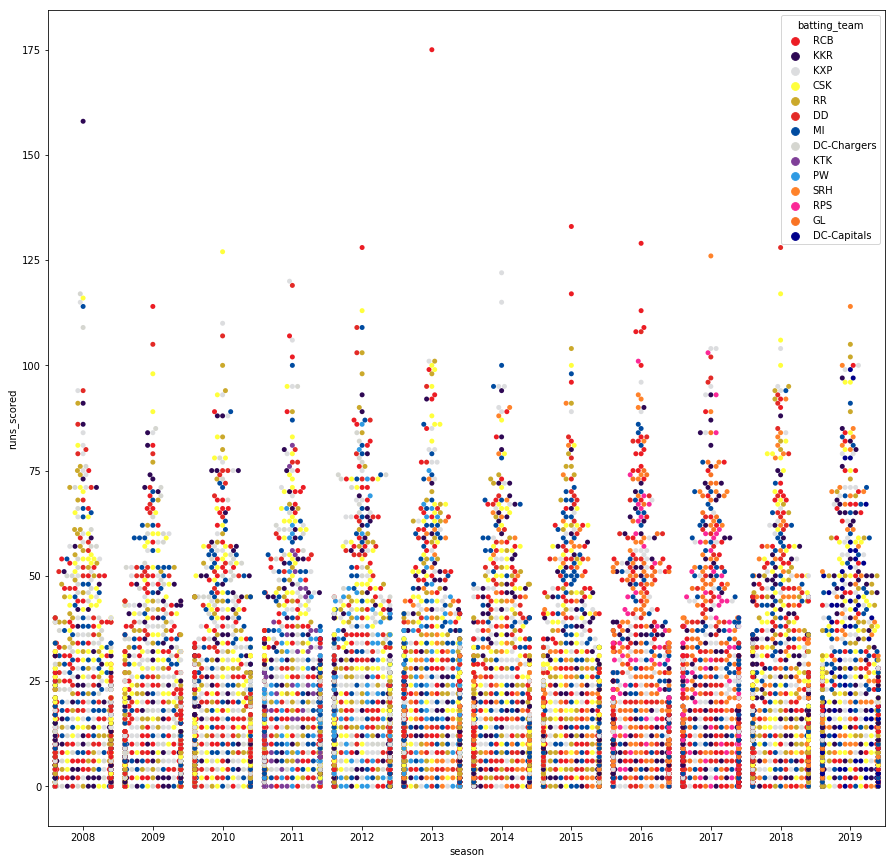

In [246]:
#plt.hist(df_batsman['runs_scored'])
plt.figure(figsize=(15,15))
sns.swarmplot(data=df_batsman,x='season',y='runs_scored',hue='batting_team');

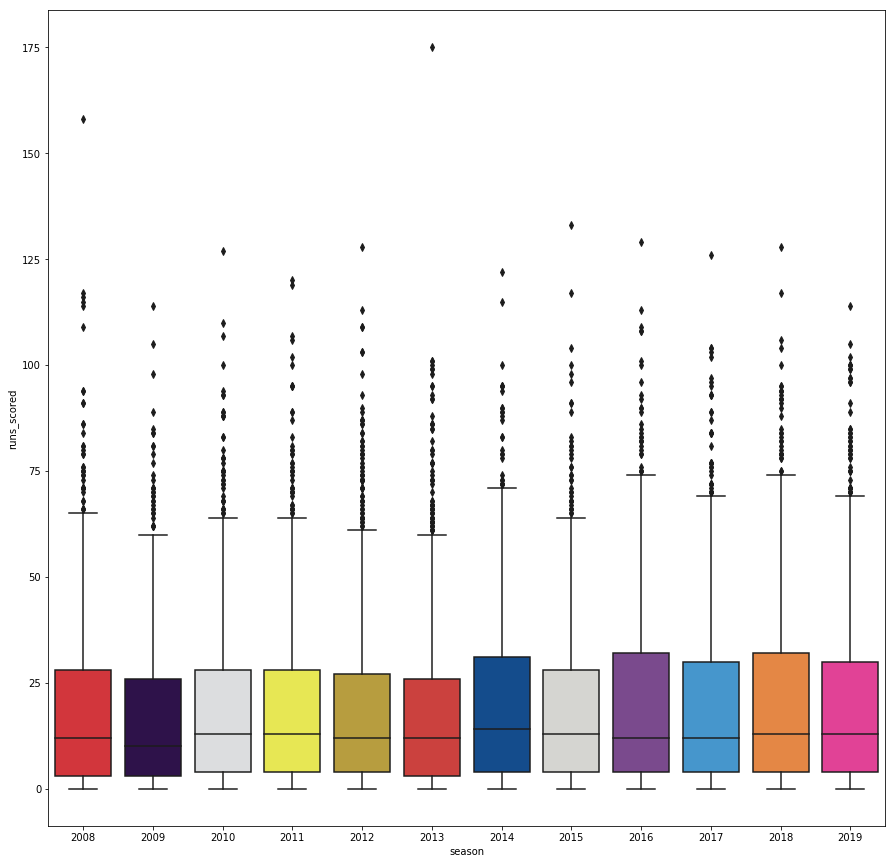

In [247]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df_batsman,x='season',y='runs_scored');

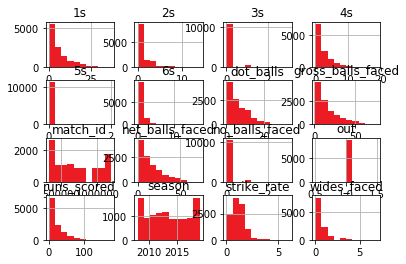

In [248]:
df_batsman.hist();

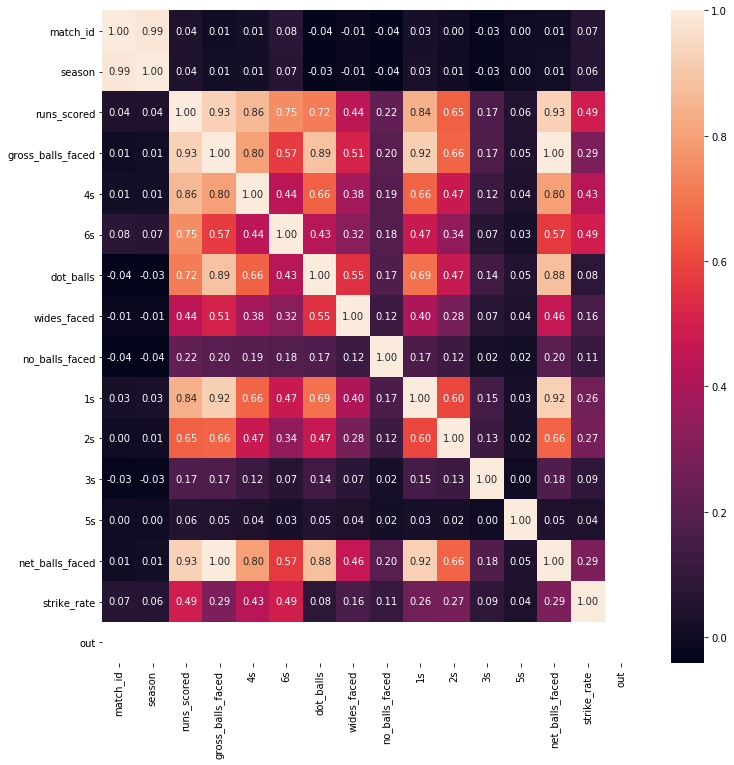

In [249]:
plt.figure(figsize=(12,12))
sns.heatmap(df_batsman.corr(),annot=True, fmt='.2f');

In [250]:
df_batsman['strike_rate'].mean()

1.1057432528313447

In [0]:
df_strike_rate_by_team_by_season = df_batsman.groupby(['season','batting_team'],as_index=False)['strike_rate'].mean()

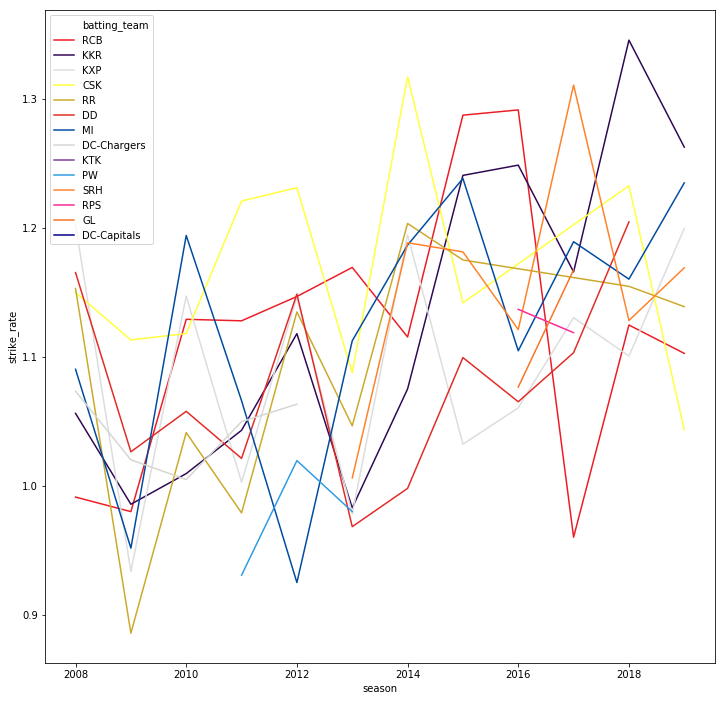

In [252]:
plt.figure(figsize=(12,12))
sns.lineplot(x='season',y='strike_rate',hue='batting_team',hue_order=list_of_teams,data=df_strike_rate_by_team_by_season);

In [253]:
list_of_seasons = list(df_batsman['season'].unique())
list_of_seasons

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [254]:
type(list_of_seasons[0])

numpy.int64

In [255]:
df_batsman[df_batsman['batting_team'] == list_of_teams[0]].head()

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate,level_0,player_out,out,batting_team
0,335982,2008,2008-04-18,AA Noffke,9.0,12,1,0,6,2.0,0.0,5,0,0,0,10.0,0.900000,inning_2,AA Noffke,1.0,RCB
1,335982,2008,2008-04-18,B Akhil,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000,inning_2,B Akhil,1.0,RCB
3,335982,2008,2008-04-18,CL White,6.0,10,0,0,5,0.0,0.0,4,1,0,0,10.0,0.600000,inning_2,CL White,1.0,RCB
5,335982,2008,2008-04-18,JH Kallis,8.0,7,0,1,4,0.0,0.0,2,0,0,0,7.0,1.142857,inning_2,JH Kallis,1.0,RCB
6,335982,2008,2008-04-18,MV Boucher,7.0,11,1,0,8,2.0,0.0,1,1,0,0,9.0,0.777778,inning_2,MV Boucher,1.0,RCB


In [0]:
team_batsman_performances = []


for team in list_of_teams:
  team_batsman_performances.append(df_batsman[df_batsman['batting_team'] == team])





In [0]:
team_batsman_seasonal_performances = []

for season in list_of_seasons:
  for team in list_of_teams:
    team_batsman_seasonal_performances.append(df_batsman[(df_batsman['batting_team'] == team) & (df_batsman['season'] == season)])

In [258]:
team_batsman_seasonal_performances[5].tail()

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate,level_0,player_out,out,batting_team
840,336038,2008,2008-05-30,Mohammad Asif,3.0,5,0,0,2,0.0,0.0,3,0,0,0,5.0,0.600000,inning_2,Mohammad Asif,1.0,DD
842,336038,2008,2008-05-30,S Dhawan,5.0,13,0,0,8,1.0,0.0,5,0,0,0,12.0,0.416667,inning_2,S Dhawan,1.0,DD
848,336038,2008,2008-05-30,TM Dilshan,33.0,22,5,1,10,0.0,0.0,5,1,0,0,22.0,1.500000,inning_2,TM Dilshan,1.0,DD
849,336038,2008,2008-05-30,V Sehwag,3.0,4,0,0,1,0.0,0.0,3,0,0,0,4.0,0.750000,inning_2,V Sehwag,1.0,DD
850,336038,2008,2008-05-30,VY Mahesh,3.0,10,0,0,7,0.0,0.0,3,0,0,0,10.0,0.300000,inning_2,VY Mahesh,1.0,DD


In [0]:
team_strikes = [x['strike_rate'].mean() for x in team_batsman_seasonal_performances]

In [260]:
team_strikes

[0.9915526515904464,
 1.056401825365469,
 1.202833079892754,
 1.1500481080399783,
 1.153153656296517,
 1.1655124216335568,
 1.0905828831996556,
 1.0735745081757324,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.980269384979976,
 0.9859907124685171,
 0.9338550272255335,
 1.1133368641156853,
 0.8860924435530904,
 1.026645595335463,
 0.9519835902880134,
 1.0204388374465228,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.1293190143081708,
 1.0097428916308409,
 1.1473498510657016,
 1.1182966318536849,
 1.0415134397952381,
 1.0579955834582566,
 1.1942763226406121,
 1.0051074247423446,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.1281516828912888,
 1.0432944813457987,
 1.0030985913310173,
 1.2209616454706356,
 0.9792700398288545,
 1.0215216383786907,
 1.066244561047606,
 1.0500003852836552,
 0.9461400163782536,
 0.9309989949723838,
 nan,
 nan,
 nan,
 nan,
 1.1469852030560925,
 1.1181871397959715,
 1.1467032824242247,
 1.2313113768975041,
 1.135057771584718,
 1.1488366146728968,
 0.9253144712768002,
 1.06353969794

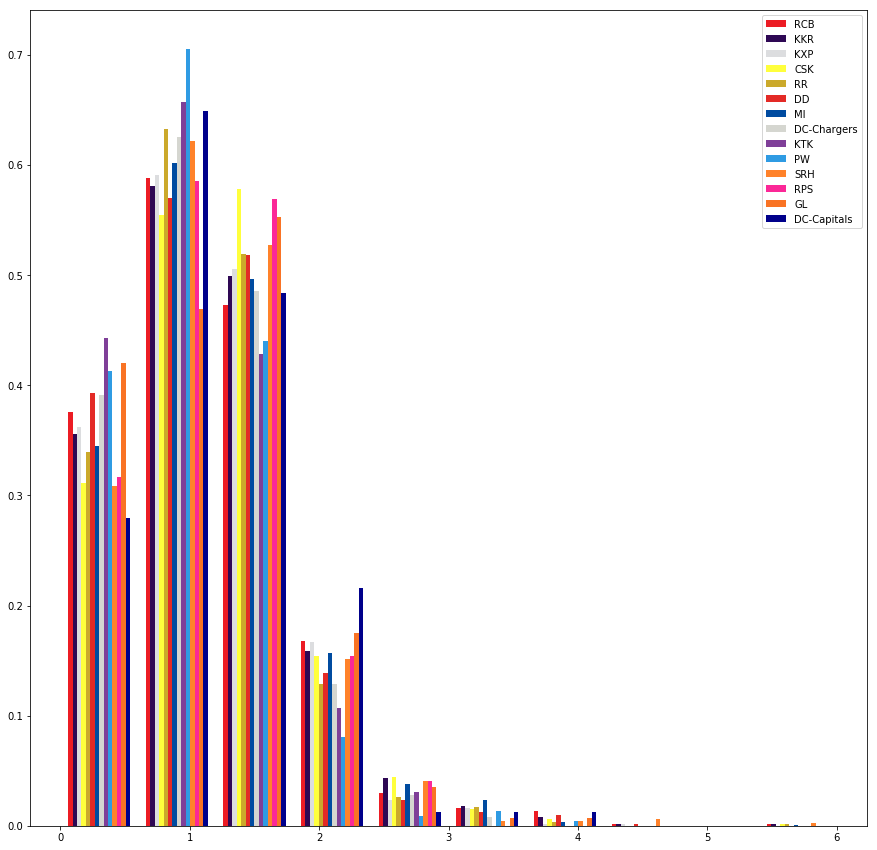

In [261]:
plt.figure(figsize=(15,15))
plt.hist([x['strike_rate'] for x in team_batsman_performances], density=1, histtype='bar',label=[x for x in list_of_teams]);
plt.legend()

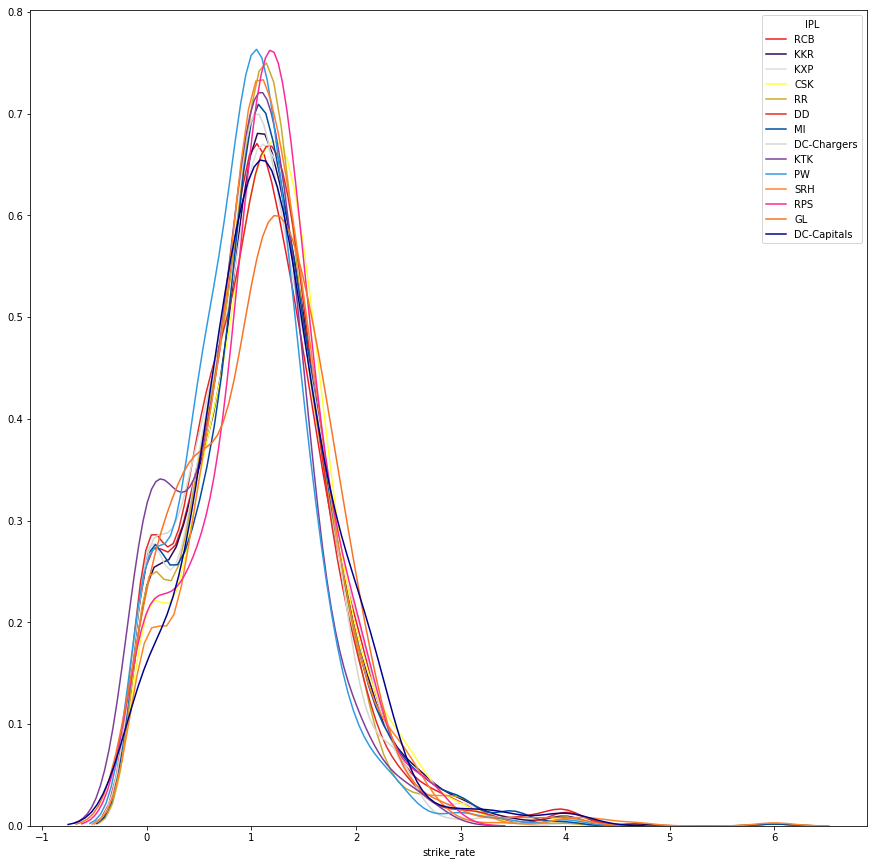

In [262]:
plt.figure(figsize=(15,15))
for i in range(len(list_of_teams)):
  g = sns.distplot(team_batsman_performances[i]['strike_rate'],rug=False,hist=False,label=list_of_teams[i])

plt.legend(title='IPL', loc='upper right')
plt.show(g)


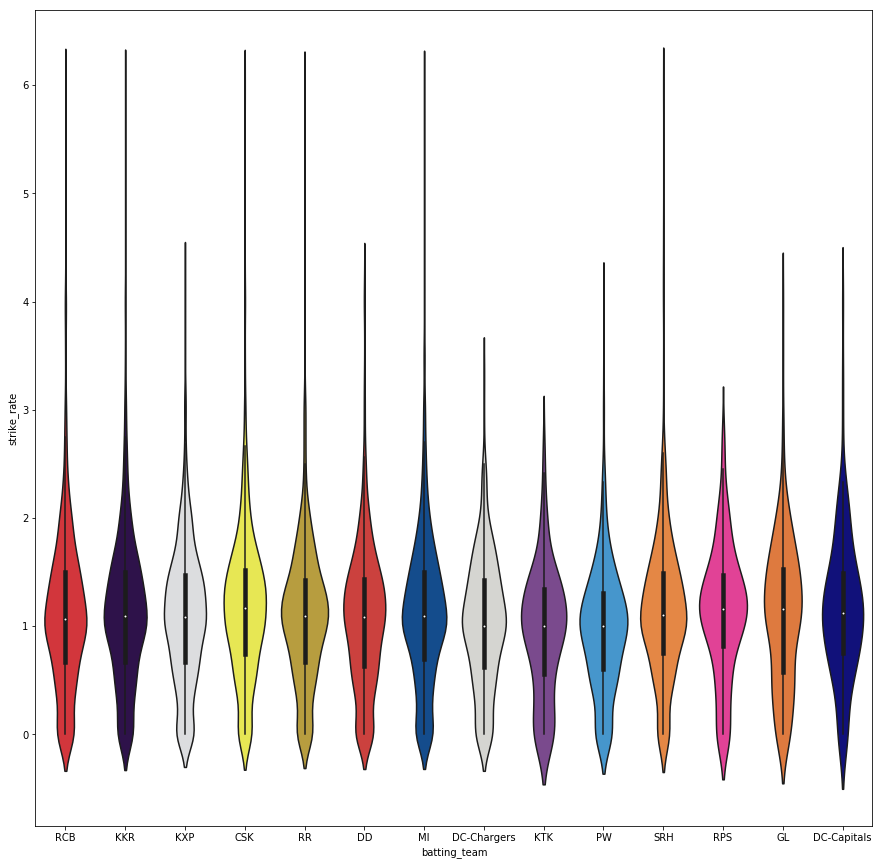

In [263]:
plt.figure(figsize=(15,15))



sns.violinplot(data=df_batsman, x='batting_team',y='strike_rate');

#plt.legend(title='IPL', loc='upper right')
#plt.show(x)





In [264]:
list_of_teams

['RCB',
 'KKR',
 'KXP',
 'CSK',
 'RR',
 'DD',
 'MI',
 'DC-Chargers',
 'KTK',
 'PW',
 'SRH',
 'RPS',
 'GL',
 'DC-Capitals']

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


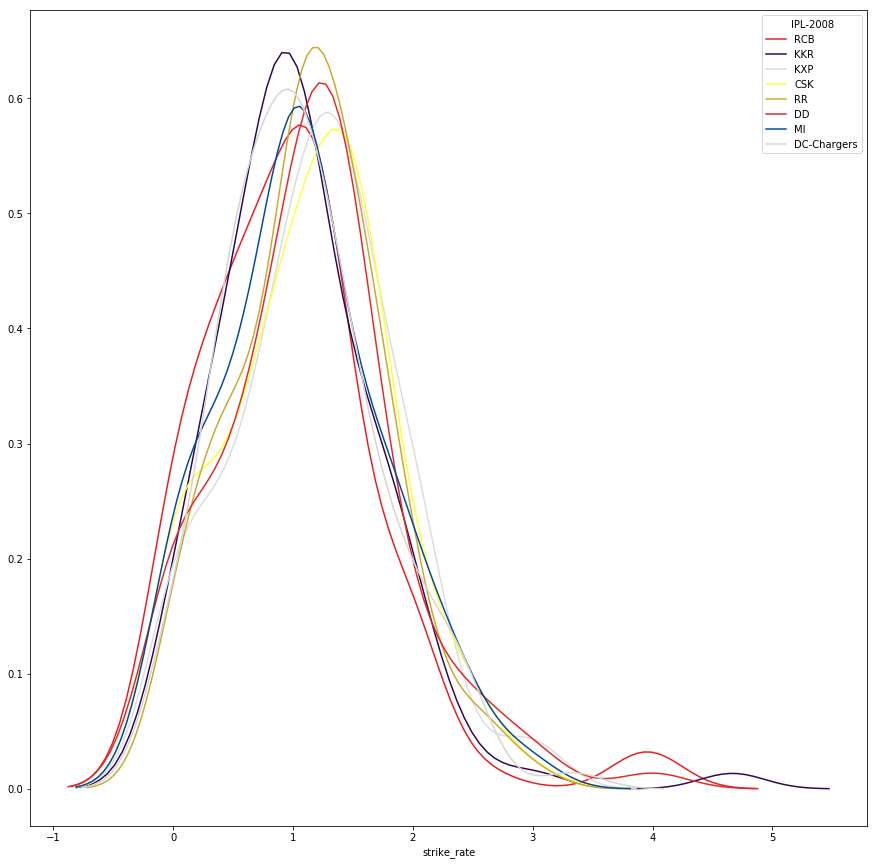

In [265]:
plt.figure(figsize=(15,15))
for i in range(len(list_of_teams)):
  g = sns.distplot(team_batsman_seasonal_performances[i]['strike_rate'],rug=False,hist=False,label=list_of_teams[i])

plt.legend(title='IPL-2008', loc='upper right')
plt.show(g)

## Runs being scored by season

In [0]:
#plt.plot(df_combined.groupby(['season'])['total'].sum())

## Runs by innings by season

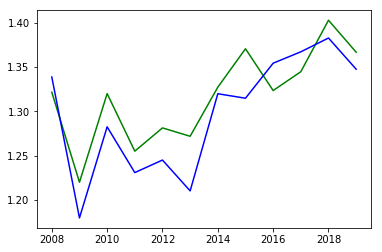

In [267]:
plt.plot(df_combined.query('level_0 == "inning_1"').groupby(['season'])['total'].mean(),color='green')
plt.plot(df_combined.query('level_0 == "inning_2"').groupby(['season'])['total'].mean(),color='blue')
plt.show()


## Highest run scorer

In [268]:
pd.DataFrame(df_combined[['season','batsman','match_id','batsman_runs']].groupby(['season','batsman','match_id'])['batsman_runs'].sum()).sort_values(by = ['batsman_runs','season'], ascending = [False, True])

,,,batsman_runs
season,batsman,match_id,
2013,CH Gayle,598027,175.0
2008,BB McCullum,335982,158.0
2015,AB de Villiers,829795,133.0
2016,AB de Villiers,980987,129.0
2012,CH Gayle,548372,128.0
2018,RR Pant,1136602,128.0
2010,M Vijay,419137,127.0
2017,DA Warner,1082627,126.0
2014,V Sehwag,734047,122.0


In [269]:
df_batsman.head()

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate,level_0,player_out,out,batting_team
0,335982,2008,2008-04-18,AA Noffke,9.0,12,1,0,6,2.0,0.0,5,0,0,0,10.0,0.900000,inning_2,AA Noffke,1.0,RCB
1,335982,2008,2008-04-18,B Akhil,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000,inning_2,B Akhil,1.0,RCB
2,335982,2008,2008-04-18,BB McCullum,158.0,77,10,13,23,4.0,0.0,22,9,0,0,73.0,2.164384,NaN,NaN,NaN,KKR
3,335982,2008,2008-04-18,CL White,6.0,10,0,0,5,0.0,0.0,4,1,0,0,10.0,0.600000,inning_2,CL White,1.0,RCB
4,335982,2008,2008-04-18,DJ Hussey,12.0,12,1,0,4,0.0,0.0,6,1,0,0,12.0,1.000000,inning_1,DJ Hussey,1.0,KKR


In [0]:
def flag_200s(row):
  if row['runs_scored'] >= 200:
    value = 1
  else:
    value = 0
  return value

def flag_100s(row):
  if (row['runs_scored'] >= 100) & (row['runs_scored'] < 200):
    value = 1
  else:
    value = 0
  return value

def flag_50s(row):
  if (row['runs_scored'] >= 50) & (row['runs_scored'] < 100):
    value = 1
  else:
    value = 0
  return value

def flag_30s(row):
  if (row['runs_scored'] >= 30) & (row['runs_scored'] < 50):
    value = 1
  else:
    value = 0
  return value


In [0]:
df_batsman['200s'] = df_batsman.apply(lambda row: flag_200s(row),axis=1)
df_batsman['100s'] = df_batsman.apply(lambda row: flag_100s(row),axis=1)
df_batsman['50s'] = df_batsman.apply(lambda row: flag_50s(row),axis=1)
df_batsman['30s'] = df_batsman.apply(lambda row: flag_30s(row),axis=1)

In [0]:
def calc_boundary_hit_rate(row):
  if row['gross_balls_faced'] != 0:
    value = (row['6s']+row['5s']+row['4s'])/row['gross_balls_faced']
  else:
    value = 0
  return value

def calc_farming_rate(row):
  if row['gross_balls_faced'] != 0:
    value = (row['3s']+row['2s']+row['1s'])/row['gross_balls_faced']
  else:
    value = 0
  return value

def calc_dot_ball_rate(row):
  if row['gross_balls_faced'] != 0:
    value = (row['dot_balls'])/row['gross_balls_faced']
  else:
    value = 0
  return value


In [0]:
df_batsman['boundary_hit_rate'] = df_batsman.apply(lambda row: calc_boundary_hit_rate(row),axis=1)
df_batsman['farming_rate'] = df_batsman.apply(lambda row: calc_farming_rate(row),axis=1)
df_batsman['dot_rate'] = df_batsman.apply(lambda row: calc_dot_ball_rate(row),axis=1)

In [274]:
df_batsman.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11294 entries, 0 to 11293
Data columns (total 28 columns):
match_id             11294 non-null int64
season               11294 non-null int64
match_date           11294 non-null datetime64[ns]
batsman              11294 non-null object
runs_scored          11294 non-null float64
gross_balls_faced    11294 non-null int64
4s                   11294 non-null int64
6s                   11294 non-null int64
dot_balls            11294 non-null int64
wides_faced          11294 non-null float64
no_balls_faced       11294 non-null float64
1s                   11294 non-null int64
2s                   11294 non-null int64
3s                   11294 non-null int64
5s                   11294 non-null int64
net_balls_faced      11294 non-null float64
strike_rate          11294 non-null float64
level_0              8787 non-null object
player_out           8787 non-null object
out                  8787 non-null float64
batting_team         11294 non

In [275]:
df_batsman.tail()

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate,level_0,player_out,out,batting_team,200s,100s,50s,30s,boundary_hit_rate,farming_rate,dot_rate
11289,1181768,2019,2019-05-12,RG Sharma,15.0,14,1,1,8,0.0,0.0,3,1,0,0,14.0,1.071429,inning_1,RG Sharma,1.0,MI,0,0,0,0,0.142857,0.285714,0.571429
11290,1181768,2019,2019-05-12,SA Yadav,15.0,17,1,0,6,0.0,0.0,9,1,0,0,17.0,0.882353,inning_1,SA Yadav,1.0,MI,0,0,0,0,0.058824,0.588235,0.352941
11291,1181768,2019,2019-05-12,SK Raina,8.0,15,0,0,8,1.0,0.0,6,1,0,0,14.0,0.571429,inning_2,SK Raina,1.0,CSK,0,0,0,0,0.000000,0.466667,0.533333
11292,1181768,2019,2019-05-12,SN Thakur,2.0,2,0,0,1,0.0,0.0,0,1,0,0,2.0,1.000000,inning_2,SN Thakur,1.0,CSK,0,0,0,0,0.000000,0.500000,0.500000
11293,1181768,2019,2019-05-12,SR Watson,80.0,62,8,4,30,3.0,0.0,16,4,0,0,59.0,1.355932,inning_2,SR Watson,1.0,CSK,0,0,1,0,0.193548,0.322581,0.483871


In [276]:
df_batsman[['season','batsman','runs_scored','net_balls_faced','100s','50s','30s','6s','5s','4s','3s','2s','1s','dot_balls','strike_rate']].sort_values(by=['runs_scored'],ascending=False).head(10)

,season,batsman,runs_scored,net_balls_faced,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls,strike_rate
5302,2013,CH Gayle,175.0,66.0,1,0,0,17,0,13,0,0,21,18,2.651515
2,2008,BB McCullum,158.0,73.0,1,0,0,13,0,10,0,9,22,23,2.164384
7528,2015,AB de Villiers,133.0,59.0,1,0,0,4,0,19,0,7,19,12,2.254237
8359,2016,AB de Villiers,129.0,52.0,1,0,0,12,0,10,0,1,15,15,2.480769
4687,2012,CH Gayle,128.0,62.0,1,0,0,13,0,7,0,1,20,21,2.064516
10149,2018,RR Pant,128.0,63.0,1,0,0,7,0,15,0,2,22,18,2.031746
2237,2010,M Vijay,127.0,56.0,1,0,0,11,1,8,0,2,20,15,2.267857
9146,2017,DA Warner,126.0,59.0,1,0,0,8,0,10,2,7,18,15,2.135593
6854,2014,V Sehwag,122.0,58.0,1,0,0,8,0,12,0,2,22,18,2.103448
2788,2011,PC Valthaty,120.0,63.0,1,0,0,2,0,19,0,5,22,16,1.904762


In [0]:
def calc_batting_strike_rate(row):
  if row['net_balls_faced'] != 0:
    value = row['runs_scored']/row['net_balls_faced']
  else:
    value = 0
  return value

def calc_batting_avg(row):
  if row['out'] != 0:
    value = row['runs_scored']/row['out']
  else:
    value = 0
  return value

def calc_balls_per_inning(row):
  if row['out'] != 0:
    value = row['net_balls_faced']/row['out']
  else:
    value = 0
  return value

In [0]:
df_batsman_seasonal_stats = df_batsman[['season','batsman','runs_scored','gross_balls_faced','net_balls_faced',\
                                        'out','100s','50s','30s','6s','5s','4s','3s','2s',\
                                        '1s','dot_balls','strike_rate']].groupby(['season','batsman'],as_index=False)['runs_scored','gross_balls_faced','net_balls_faced','out',\
                                                                                          '100s','50s','30s','6s','5s','4s','3s',\
                                                                                          '2s','1s','dot_balls'].sum()

In [279]:
df_batsman_seasonal_stats.head(10)

,season,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls
0,2008,A Chopra,42.0,55,52.0,5.0,0,0,0,0,0,5,0,2,18,30
1,2008,A Kumble,13.0,17,17.0,2.0,0,0,0,0,0,1,0,1,7,8
2,2008,A Mishra,37.0,42,42.0,3.0,0,0,1,0,0,3,0,2,21,16
3,2008,A Mukund,0.0,1,1.0,1.0,0,0,0,0,0,0,0,0,0,1
4,2008,A Nehra,3.0,13,13.0,1.0,0,0,0,0,0,0,0,0,3,10
5,2008,A Symonds,161.0,111,105.0,2.0,1,0,1,9,0,15,1,5,34,47
6,2008,AA Noffke,9.0,12,10.0,1.0,0,0,0,0,0,1,0,0,5,6
7,2008,AB Agarkar,54.0,49,46.0,5.0,0,0,0,2,0,5,0,4,14,24
8,2008,AB Dinda,2.0,4,4.0,1.0,0,0,0,0,0,0,0,0,2,2
9,2008,AB de Villiers,95.0,100,98.0,5.0,0,0,0,1,0,5,0,16,37,41


In [280]:
df_batsman_seasonal_stats['season_strike_rate'] = df_batsman_seasonal_stats.apply(lambda row: calc_batting_strike_rate(row),axis=1)
df_batsman_seasonal_stats['season_batting_avg'] = df_batsman_seasonal_stats.apply(lambda row: calc_batting_avg(row),axis=1)
df_batsman_seasonal_stats['balls_per_inning'] = df_batsman_seasonal_stats.apply(lambda row: calc_balls_per_inning(row),axis=1)

df_batsman_seasonal_stats['boundary_hit_rate'] = df_batsman_seasonal_stats.apply(lambda row: calc_boundary_hit_rate(row),axis=1)
df_batsman_seasonal_stats['farming_rate'] = df_batsman_seasonal_stats.apply(lambda row: calc_farming_rate(row),axis=1)
df_batsman_seasonal_stats['dot_rate'] = df_batsman_seasonal_stats.apply(lambda row: calc_dot_ball_rate(row),axis=1)


df_batsman_seasonal_stats.head()


,season,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls,season_strike_rate,season_batting_avg,balls_per_inning,boundary_hit_rate,farming_rate,dot_rate
0,2008,A Chopra,42.0,55,52.0,5.0,0,0,0,0,0,5,0,2,18,30,0.807692,8.400000,10.4,0.090909,0.363636,0.545455
1,2008,A Kumble,13.0,17,17.0,2.0,0,0,0,0,0,1,0,1,7,8,0.764706,6.500000,8.5,0.058824,0.470588,0.470588
2,2008,A Mishra,37.0,42,42.0,3.0,0,0,1,0,0,3,0,2,21,16,0.880952,12.333333,14.0,0.071429,0.547619,0.380952
3,2008,A Mukund,0.0,1,1.0,1.0,0,0,0,0,0,0,0,0,0,1,0.000000,0.000000,1.0,0.000000,0.000000,1.000000
4,2008,A Nehra,3.0,13,13.0,1.0,0,0,0,0,0,0,0,0,3,10,0.230769,3.000000,13.0,0.000000,0.230769,0.769231


In [281]:
df_batsman_seasonal_stats.sort_values(by=['season_batting_avg','season_strike_rate','balls_per_inning'],ascending=False).head(20)

,season,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls,season_strike_rate,season_batting_avg,balls_per_inning,boundary_hit_rate,farming_rate,dot_rate
60,2008,LA Pomersbach,152.0,101,99.0,1.0,0,1,1,9,0,13,0,3,40,36,1.535354,152.000000,99.000000,0.217822,0.425743,0.356436
119,2008,SM Katich,96.0,72,69.0,1.0,0,1,0,2,0,11,1,8,21,29,1.391304,96.000000,69.000000,0.180556,0.416667,0.402778
1172,2015,JA Morkel,86.0,70,65.0,1.0,0,1,0,2,0,9,0,5,28,26,1.323077,86.000000,65.000000,0.157143,0.471429,0.371429
70,2008,MEK Hussey,168.0,100,100.0,2.0,1,0,1,11,0,12,0,8,38,31,1.680000,84.000000,50.000000,0.230000,0.460000,0.310000
227,2009,MK Pandey,168.0,120,118.0,2.0,1,0,1,4,0,17,0,18,40,41,1.423729,84.000000,59.000000,0.175000,0.483333,0.341667
1748,2019,MS Dhoni,416.0,317,309.0,5.0,0,3,4,23,0,22,0,35,120,117,1.346278,83.200000,61.800000,0.141956,0.488959,0.369085
725,2012,JP Duminy,244.0,195,190.0,3.0,0,2,0,11,0,13,0,17,92,62,1.284211,81.333333,63.333333,0.123077,0.558974,0.317949
1383,2016,V Kohli,973.0,655,640.0,12.0,4,7,1,38,0,84,2,56,291,184,1.520312,81.083333,53.333333,0.186260,0.532824,0.280916
5,2008,A Symonds,161.0,111,105.0,2.0,1,0,1,9,0,15,1,5,34,47,1.533333,80.500000,52.500000,0.216216,0.360360,0.423423
1612,2018,MS Dhoni,455.0,321,302.0,6.0,0,3,3,30,0,24,2,18,137,110,1.506623,75.833333,50.333333,0.168224,0.489097,0.342679


In [282]:
df_batsman_seasonal_stats.query('batsman=="MS Dhoni"')

,season,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls,season_strike_rate,season_batting_avg,balls_per_inning,boundary_hit_rate,farming_rate,dot_rate
76,2008,MS Dhoni,414.0,319,310.0,10.0,0,2,6,15,0,38,2,26,114,124,1.335484,41.400000,31.000000,0.166144,0.445141,0.388715
232,2009,MS Dhoni,332.0,270,261.0,8.0,0,2,2,9,0,22,1,24,139,75,1.272031,41.500000,32.625000,0.114815,0.607407,0.277778
398,2010,MS Dhoni,287.0,215,210.0,9.0,0,2,3,8,0,26,0,20,95,66,1.366667,31.888889,23.333333,0.158140,0.534884,0.306977
567,2011,MS Dhoni,392.0,247,247.0,9.0,0,2,2,23,0,25,1,22,107,69,1.587045,43.555556,27.444444,0.194332,0.526316,0.279352
751,2012,MS Dhoni,357.0,283,278.0,12.0,0,1,3,9,0,26,1,37,122,88,1.284173,29.750000,23.166667,0.123675,0.565371,0.310954
918,2013,MS Dhoni,461.0,298,283.0,11.0,0,4,3,25,0,32,3,30,114,94,1.628975,41.909091,25.727273,0.191275,0.493289,0.315436
1066,2014,MS Dhoni,371.0,258,250.0,5.0,0,1,3,20,0,22,2,28,101,85,1.484000,74.200000,50.000000,0.162791,0.507752,0.329457
1197,2015,MS Dhoni,372.0,309,305.0,12.0,0,1,4,17,0,27,0,24,114,127,1.219672,31.000000,25.416667,0.142395,0.446602,0.411003
1332,2016,MS Dhoni,284.0,220,210.0,7.0,0,1,3,14,0,18,1,20,85,82,1.352381,40.571429,30.000000,0.145455,0.481818,0.372727
1471,2017,MS Dhoni,290.0,261,250.0,11.0,0,1,2,16,0,15,0,20,94,116,1.160000,26.363636,22.727273,0.118774,0.436782,0.444444


In [0]:
df_mvp = pd.DataFrame(df_batsman_seasonal_stats.\
                      groupby('batsman',as_index=False)\
                      ['runs_scored','gross_balls_faced','net_balls_faced','out',\
                       '100s','50s','30s','6s','5s','4s','3s','2s','1s','dot_balls']\
                      .sum()\
                      .sort_values(by=['runs_scored','gross_balls_faced','net_balls_faced','100s','50s','30s'],\
                                   ascending=False)['batsman']\
                      .head(10)\
                      .reset_index(drop=True))



In [284]:
list(df_mvp['batsman'])


['V Kohli',
 'SK Raina',
 'RG Sharma',
 'DA Warner',
 'S Dhawan',
 'CH Gayle',
 'MS Dhoni',
 'RV Uthappa',
 'AB de Villiers',
 'G Gambhir']

In [285]:
df_mvp

,batsman
0,V Kohli
1,SK Raina
2,RG Sharma
3,DA Warner
4,S Dhawan
5,CH Gayle
6,MS Dhoni
7,RV Uthappa
8,AB de Villiers
9,G Gambhir


In [0]:
mvp_list = df_mvp['batsman']

In [287]:
len(mvp_list)

10

In [0]:
df_mvp_comparison = df_batsman_seasonal_stats.groupby('batsman',as_index=False)['runs_scored','gross_balls_faced','net_balls_faced','out',\
                                                            '100s','50s','30s','6s','5s','4s','3s',\
                                                            '2s','1s','dot_balls'].sum().query('batsman in @mvp_list') 



In [289]:
df_mvp_comparison['ipl_strike_rate'] = df_mvp_comparison.apply(lambda row: calc_batting_strike_rate(row),axis=1)
df_mvp_comparison['ipl_batting_avg'] = df_mvp_comparison.apply(lambda row: calc_batting_avg(row),axis=1)
df_mvp_comparison['ipl_balls_per_inning'] = df_mvp_comparison.apply(lambda row: calc_balls_per_inning(row),axis=1)

df_mvp_comparison['boundary_hit_rate'] = df_mvp_comparison.apply(lambda row: calc_boundary_hit_rate(row),axis=1)
df_mvp_comparison['farming_rate'] = df_mvp_comparison.apply(lambda row: calc_farming_rate(row),axis=1)
df_mvp_comparison['dot_rate'] = df_mvp_comparison.apply(lambda row: calc_dot_ball_rate(row),axis=1)


df_mvp_comparison = df_mvp_comparison.sort_values(by=['runs_scored','gross_balls_faced','net_balls_faced','100s','50s','30s'],\
                                   ascending=False).reset_index(drop=True)

df_mvp_comparison

,batsman,runs_scored,gross_balls_faced,net_balls_faced,out,100s,50s,30s,6s,5s,4s,3s,2s,1s,dot_balls,ipl_strike_rate,ipl_batting_avg,ipl_balls_per_inning,boundary_hit_rate,farming_rate,dot_rate
0,V Kohli,5412.0,4208,4111.0,143.0,5,36,36,191,0,481,11,292,1725,1508,1.316468,37.846154,28.748252,0.159696,0.481939,0.358365
1,SK Raina,5368.0,4041,3914.0,161.0,1,38,37,194,1,493,11,264,1666,1412,1.371487,33.341615,24.310559,0.170255,0.480327,0.349418
2,RG Sharma,4898.0,3816,3744.0,154.0,1,36,31,195,1,431,5,204,1576,1404,1.308226,31.805195,24.311688,0.164308,0.467767,0.367925
3,DA Warner,4706.0,3397,3305.0,109.0,4,44,19,181,1,458,17,270,1192,1278,1.423903,43.174312,30.321101,0.188402,0.435384,0.376214
4,S Dhawan,4579.0,3775,3669.0,138.0,0,37,26,96,2,524,18,201,1441,1493,1.248024,33.181159,26.586957,0.164768,0.439735,0.395497
5,CH Gayle,4484.0,3118,2969.0,109.0,6,28,21,326,0,369,3,80,883,1457,1.510273,41.137615,27.238532,0.222899,0.309814,0.467287
6,MS Dhoni,4431.0,3318,3215.0,105.0,0,23,38,209,0,297,13,304,1342,1153,1.378227,42.200000,30.619048,0.152502,0.500000,0.347498
7,RV Uthappa,4411.0,3488,3380.0,153.0,0,24,40,156,3,435,13,205,1271,1405,1.305030,28.830065,22.091503,0.170298,0.426892,0.402810
8,AB de Villiers,4395.0,2972,2906.0,110.0,3,33,20,212,0,357,15,220,1210,958,1.512388,39.954545,26.418182,0.191454,0.486205,0.322342
9,G Gambhir,4217.0,3524,3404.0,135.0,0,36,22,59,0,492,15,249,1352,1357,1.238837,31.237037,25.214815,0.156356,0.458570,0.385074


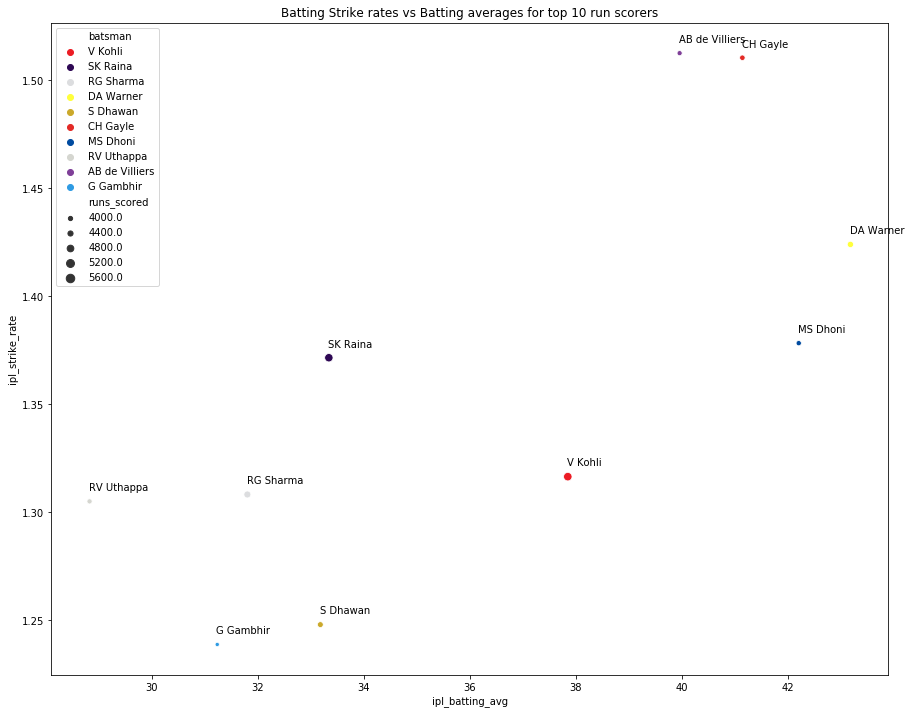

In [290]:
plt.figure(figsize=(15,12))
p1 = sns.scatterplot(x="ipl_batting_avg", y="ipl_strike_rate",\
                     hue='batsman', hue_order=mvp_list,size='runs_scored',\
                     data=df_mvp_comparison\
                     
                    )
for line in range(0,df_mvp_comparison.shape[0]):
  p1.text(df_mvp_comparison.ipl_batting_avg[line]-0.015,df_mvp_comparison.ipl_strike_rate[line]+0.005,df_mvp_comparison.batsman[line])

p1.set_title('Batting Strike rates vs Batting averages for top 10 run scorers')
plt.show(p1)



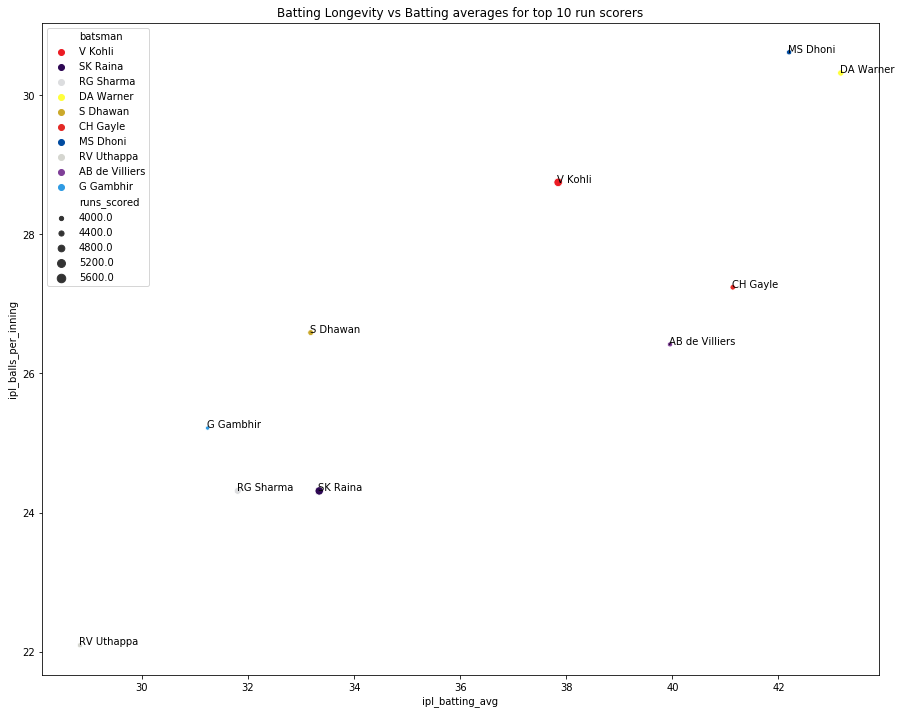

In [291]:
plt.figure(figsize=(15,12))
p2 = sns.scatterplot(x="ipl_batting_avg", y="ipl_balls_per_inning",\
                     hue='batsman', hue_order=mvp_list,size='runs_scored',\
                     data=df_mvp_comparison\
                     
                    )
for line in range(0,df_mvp_comparison.shape[0]):
  p2.text(df_mvp_comparison.ipl_batting_avg[line]-0.015,df_mvp_comparison.ipl_balls_per_inning[line]+0.005,df_mvp_comparison.batsman[line])

p2.set_title('Batting Longevity vs Batting averages for top 10 run scorers')
plt.show(p2)

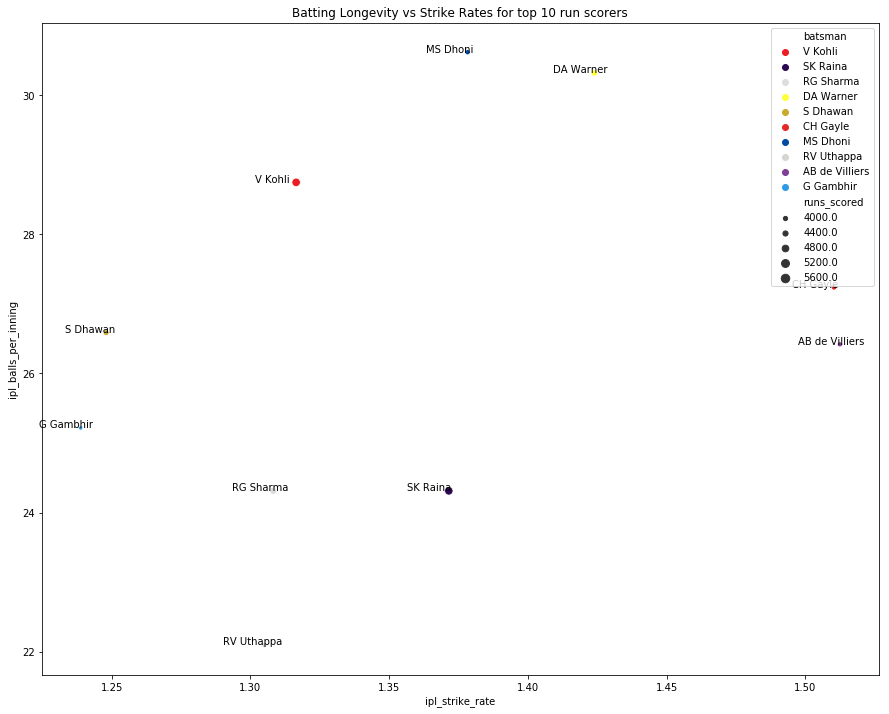

In [292]:
plt.figure(figsize=(15,12))
p3 = sns.scatterplot(x="ipl_strike_rate", y="ipl_balls_per_inning",\
                     hue='batsman', hue_order=mvp_list,size='runs_scored',\
                     data=df_mvp_comparison\
                     
                    )
for line in range(0,df_mvp_comparison.shape[0]):
  p3.text(df_mvp_comparison.ipl_strike_rate[line]-0.015,df_mvp_comparison.ipl_balls_per_inning[line]+0.005,df_mvp_comparison.batsman[line])

p3.set_title('Batting Longevity vs Strike Rates for top 10 run scorers')
plt.show(p3)

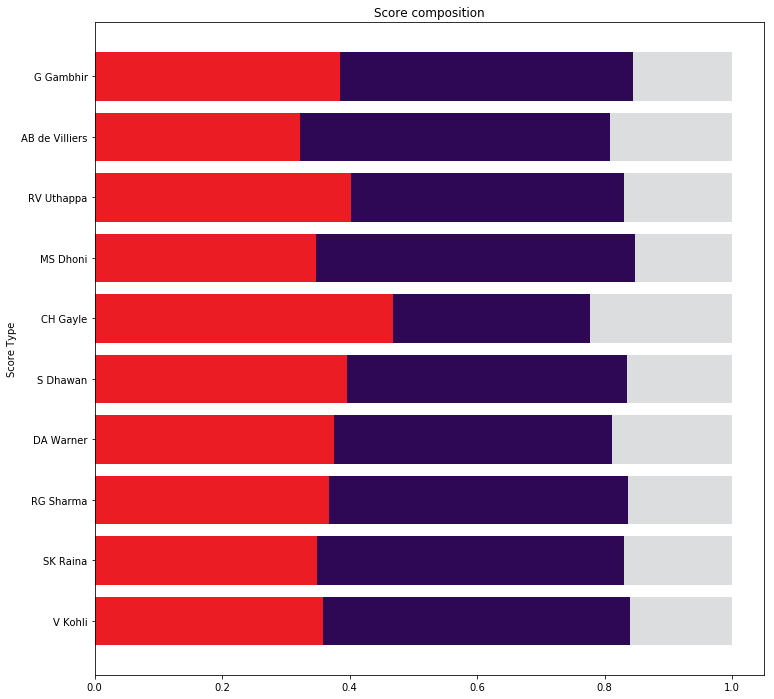

In [293]:
plt.figure(figsize=(12,12))

p4 = plt.barh(y=df_mvp_comparison['batsman'],width=df_mvp_comparison['dot_rate'])
p5 = plt.barh(y=df_mvp_comparison['batsman'],width=df_mvp_comparison['farming_rate'],left=df_mvp_comparison['dot_rate'])
p6 = plt.barh(y=df_mvp_comparison['batsman'],width=df_mvp_comparison['boundary_hit_rate'],left=df_mvp_comparison['dot_rate']+df_mvp_comparison['farming_rate'])



plt.ylabel('Score Type')
plt.title('Score composition')

plt.show()

In [294]:
df_mvp_comparison.ipl_batting_avg[0]

37.84615384615385

In [295]:
df_mvp_comparison.shape[0]

10

In [0]:
df_best_batsman = df_batsman.merge(df_mvp,how='right',left_on=['batsman'],right_on=['batsman'])

In [297]:
df_best_batsman.head()

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate,level_0,player_out,out,batting_team,200s,100s,50s,30s,boundary_hit_rate,farming_rate,dot_rate
0,335982,2008,2008-04-18,V Kohli,1.0,5,0,0,4,0.0,0.0,1,0,0,0,5.0,0.200000,inning_2,V Kohli,1.0,RCB,0,0,0,0,0.000000,0.200000,0.800000
1,335985,2008,2008-04-20,V Kohli,23.0,15,3,1,6,1.0,0.0,5,0,0,0,14.0,1.642857,inning_2,V Kohli,1.0,RCB,0,0,0,0,0.266667,0.333333,0.400000
2,335992,2008,2008-04-26,V Kohli,13.0,16,0,1,9,2.0,0.0,5,1,0,0,14.0,0.928571,inning_1,V Kohli,1.0,RCB,0,0,0,0,0.062500,0.375000,0.562500
3,335996,2008,2008-04-28,V Kohli,12.0,7,2,0,2,0.0,0.0,2,1,0,0,7.0,1.714286,inning_2,V Kohli,1.0,RCB,0,0,0,0,0.285714,0.428571,0.285714
4,335998,2008,2008-04-30,V Kohli,1.0,1,0,0,0,0.0,0.0,1,0,0,0,1.0,1.000000,NaN,NaN,NaN,RCB,0,0,0,0,0.000000,1.000000,0.000000


Text(0.5, 1.0, 'Strike Rates by player for each inning')

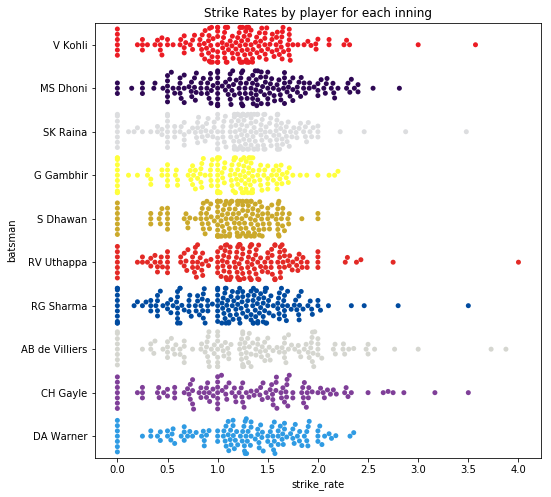

In [298]:
plt.figure(figsize=(8,8))
sns.swarmplot(data=df_best_batsman,x='strike_rate',y='batsman').set_title('Strike Rates by player for each inning')
#sns.violinplot(data=df_best_batsman,x='strike_rate',y='batsman')

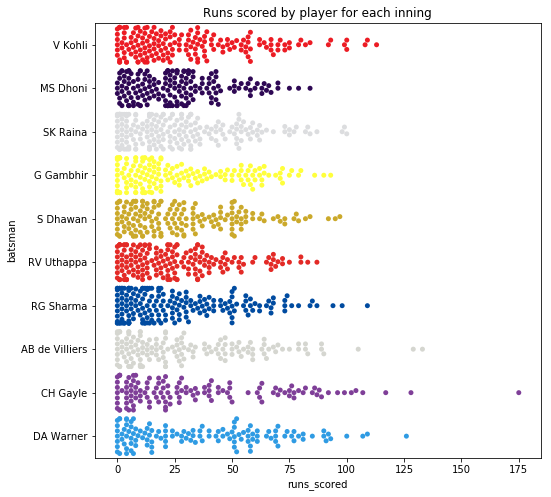

In [299]:
plt.figure(figsize=(8,8))
sns.swarmplot(data=df_best_batsman,x='runs_scored',y='batsman').set_title('Runs scored by player for each inning');

Text(0.5, 1.0, 'Balls faced by player for each inning')

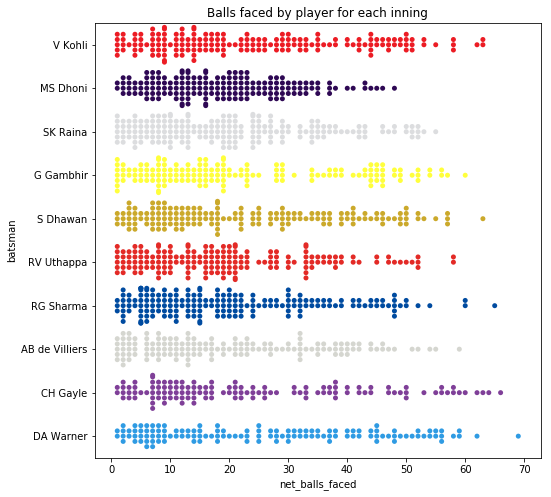

In [300]:
plt.figure(figsize=(8,8))
sns.swarmplot(data=df_best_batsman,x='net_balls_faced',y='batsman').set_title('Balls faced by player for each inning')

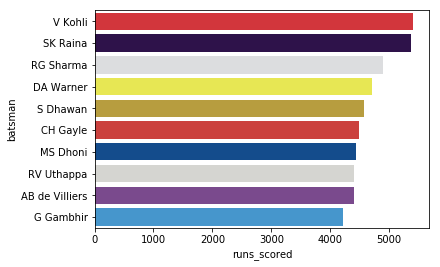

In [301]:
sns.barplot(data=df_mvp_comparison,x='runs_scored',y='batsman')

In [302]:
df_match_summary['player_of_match'].value_counts()

CH Gayle             21
AB de Villiers       20
MS Dhoni             17
DA Warner            17
RG Sharma            17
YK Pathan            16
SR Watson            15
SK Raina             14
G Gambhir            13
V Kohli              12
AM Rahane            12
MEK Hussey           12
A Mishra             11
AD Russell           11
V Sehwag             11
DR Smith             11
KA Pollard           10
JH Kallis            10
SP Narine             9
SE Marsh              9
AT Rayudu             9
Harbhajan Singh       8
RA Jadeja             8
SR Tendulkar          8
UT Yadav              8
RV Uthappa            7
AC Gilchrist          7
Rashid Khan           7
M Vijay               6
S Dhawan              6
                     ..
TG Southee            1
TM Dilshan            1
S Nadeem              1
MA Starc              1
BCJ Cutting           1
CR Brathwaite         1
S Sohal               1
SM Curran             1
NV Ojha               1
DJ Hooda              1
Mohammed Shami  

In [303]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178949 entries, 0 to 178948
Data columns (total 51 columns):
0_extras                      0 non-null float64
0_wickets                     0 non-null float64
batsman                       178940 non-null object
batsman_runs                  178940 non-null float64
batting_team                  178949 non-null object
bowler                        178940 non-null object
byes                          480 non-null float64
extras_runs                   178299 non-null float64
kind                          8827 non-null object
legbyes                       2933 non-null float64
level_0                       178949 non-null object
level_1                       178949 non-null object
match_id                      178949 non-null int64
noballs                       712 non-null float64
non_boundary                  14 non-null float64
non_striker                   178940 non-null object
player_out                    8827 non-null object
total  

In [304]:
df_details.head()

,0_extras,0_wickets,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_boundary,non_striker,player_out,total,wides,0.1,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag
0,NaN,NaN,DA Warner,2.0,DD,P Kumar,NaN,0.0,NaN,NaN,inning_1,0.1,419128,NaN,NaN,V Sehwag,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,Q1,None,None,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
1,NaN,NaN,DA Warner,2.0,DD,P Kumar,NaN,0.0,NaN,NaN,inning_1,0.2,419128,NaN,NaN,V Sehwag,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2,Q1,None,None,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
2,NaN,NaN,DA Warner,2.0,DD,P Kumar,NaN,0.0,NaN,NaN,inning_1,0.3,419128,NaN,NaN,V Sehwag,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,3,Q1,None,None,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
3,NaN,NaN,DA Warner,0.0,DD,P Kumar,NaN,0.0,NaN,NaN,inning_1,0.4,419128,NaN,NaN,V Sehwag,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
4,NaN,NaN,DA Warner,6.0,DD,P Kumar,NaN,0.0,NaN,NaN,inning_1,0.5,419128,NaN,NaN,V Sehwag,NaN,6.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,5,Q1,None,None,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False


In [305]:
df_details.query('match_id==335982' ).groupby(['level_0','inning_quarter'],as_index=False)['total','batsman_runs','extras_runs','byes','legbyes','wides','noballs'].sum()

,level_0,inning_quarter,total,batsman_runs,extras_runs,byes,legbyes,wides,noballs
0,inning_1,Q1,60.0,50.0,10.0,0.0,4.0,6.0,0.0
1,inning_1,Q2,27.0,27.0,0.0,0.0,0.0,0.0,0.0
2,inning_1,Q3,67.0,60.0,7.0,4.0,0.0,3.0,0.0
3,inning_1,Q4,68.0,68.0,0.0,0.0,0.0,0.0,0.0
4,inning_2,Q1,24.0,17.0,7.0,0.0,5.0,2.0,0.0
5,inning_2,Q2,27.0,20.0,7.0,0.0,2.0,5.0,0.0
6,inning_2,Q3,30.0,26.0,4.0,0.0,1.0,3.0,0.0
7,inning_2,Q4,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [0]:
df_inning_wise = df_details[['match_id','level_0','inning_quarter',\
                             'player_out','batsman_runs','total','6_flag','4_flag',\
                             'dot_ball_flag','delivery','wides','noballs']].groupby(['match_id',\
                                                                             'level_0',\
                                                                             'inning_quarter'],as_index=False)['batsman_runs','total','player_out','delivery',\
                                                                                                               'wides','noballs','6_flag',\
                                                                                                               '4_flag','dot_ball_flag'].agg({'batsman_runs':'sum','total':'sum',\
                                                                                                               'player_out':'count','delivery':'count',\
                                                                                                               'wides':'sum','noballs':'sum',\
                                                                                                               '6_flag':'count','4_flag':'count',\
                                                                                                               'dot_ball_flag':'count'})



In [307]:
df_inning_wise.head()

,match_id,level_0,inning_quarter,batsman_runs,total,player_out,delivery,wides,noballs,6_flag,4_flag,dot_ball_flag
0,335982,inning_1,Q1,50.0,60.0,0,32,6.0,0.0,3,7,18
1,335982,inning_1,Q2,27.0,27.0,1,30,0.0,0.0,1,0,10
2,335982,inning_1,Q3,60.0,67.0,1,32,3.0,0.0,4,5,10
3,335982,inning_1,Q4,68.0,68.0,1,30,0.0,0.0,6,3,7
4,335982,inning_2,Q1,17.0,24.0,3,32,2.0,0.0,1,0,21


In [308]:
df_inning_wise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5924 entries, 0 to 5923
Data columns (total 12 columns):
match_id          5924 non-null int64
level_0           5924 non-null object
inning_quarter    5924 non-null object
batsman_runs      5924 non-null float64
total             5924 non-null float64
player_out        5924 non-null int64
delivery          5924 non-null int64
wides             5924 non-null float64
noballs           5924 non-null float64
6_flag            5924 non-null int64
4_flag            5924 non-null int64
dot_ball_flag     5924 non-null int64
dtypes: float64(4), int64(6), object(2)
memory usage: 601.7+ KB


In [0]:
df_unstacked = df_inning_wise.set_index(\
                                        ['match_id','inning_quarter','level_0']\
                                        ).unstack().unstack()



In [310]:
df_unstacked.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 335982 to 1181768
Data columns (total 72 columns):
(batsman_runs, inning_1, Q1)     756 non-null float64
(batsman_runs, inning_1, Q2)     755 non-null float64
(batsman_runs, inning_1, Q3)     752 non-null float64
(batsman_runs, inning_1, Q4)     744 non-null float64
(batsman_runs, inning_2, Q1)     754 non-null float64
(batsman_runs, inning_2, Q2)     749 non-null float64
(batsman_runs, inning_2, Q3)     734 non-null float64
(batsman_runs, inning_2, Q4)     680 non-null float64
(total, inning_1, Q1)            756 non-null float64
(total, inning_1, Q2)            755 non-null float64
(total, inning_1, Q3)            752 non-null float64
(total, inning_1, Q4)            744 non-null float64
(total, inning_2, Q1)            754 non-null float64
(total, inning_2, Q2)            749 non-null float64
(total, inning_2, Q3)            734 non-null float64
(total, inning_2, Q4)            680 non-null float64
(player_out, inning_1,

In [311]:
df_unstacked.columns.names

FrozenList([None, 'level_0', 'inning_quarter'])

In [312]:
df_unstacked.columns.values

array([('batsman_runs', 'inning_1', 'Q1'),
       ('batsman_runs', 'inning_1', 'Q2'),
       ('batsman_runs', 'inning_1', 'Q3'),
       ('batsman_runs', 'inning_1', 'Q4'),
       ('batsman_runs', 'inning_2', 'Q1'),
       ('batsman_runs', 'inning_2', 'Q2'),
       ('batsman_runs', 'inning_2', 'Q3'),
       ('batsman_runs', 'inning_2', 'Q4'), ('total', 'inning_1', 'Q1'),
       ('total', 'inning_1', 'Q2'), ('total', 'inning_1', 'Q3'),
       ('total', 'inning_1', 'Q4'), ('total', 'inning_2', 'Q1'),
       ('total', 'inning_2', 'Q2'), ('total', 'inning_2', 'Q3'),
       ('total', 'inning_2', 'Q4'), ('player_out', 'inning_1', 'Q1'),
       ('player_out', 'inning_1', 'Q2'), ('player_out', 'inning_1', 'Q3'),
       ('player_out', 'inning_1', 'Q4'), ('player_out', 'inning_2', 'Q1'),
       ('player_out', 'inning_2', 'Q2'), ('player_out', 'inning_2', 'Q3'),
       ('player_out', 'inning_2', 'Q4'), ('delivery', 'inning_1', 'Q1'),
       ('delivery', 'inning_1', 'Q2'), ('delivery', 'inning_1', 

In [0]:
df_unstacked.columns = ['_'.join(col).strip() for col in df_unstacked.columns.values]

In [314]:
df_unstacked.columns.values

array(['batsman_runs_inning_1_Q1', 'batsman_runs_inning_1_Q2',
       'batsman_runs_inning_1_Q3', 'batsman_runs_inning_1_Q4',
       'batsman_runs_inning_2_Q1', 'batsman_runs_inning_2_Q2',
       'batsman_runs_inning_2_Q3', 'batsman_runs_inning_2_Q4',
       'total_inning_1_Q1', 'total_inning_1_Q2', 'total_inning_1_Q3',
       'total_inning_1_Q4', 'total_inning_2_Q1', 'total_inning_2_Q2',
       'total_inning_2_Q3', 'total_inning_2_Q4', 'player_out_inning_1_Q1',
       'player_out_inning_1_Q2', 'player_out_inning_1_Q3',
       'player_out_inning_1_Q4', 'player_out_inning_2_Q1',
       'player_out_inning_2_Q2', 'player_out_inning_2_Q3',
       'player_out_inning_2_Q4', 'delivery_inning_1_Q1',
       'delivery_inning_1_Q2', 'delivery_inning_1_Q3',
       'delivery_inning_1_Q4', 'delivery_inning_2_Q1',
       'delivery_inning_2_Q2', 'delivery_inning_2_Q3',
       'delivery_inning_2_Q4', 'wides_inning_1_Q1', 'wides_inning_1_Q2',
       'wides_inning_1_Q3', 'wides_inning_1_Q4', 'wides_innin

In [315]:
df_unstacked.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 335982 to 1181768
Data columns (total 72 columns):
batsman_runs_inning_1_Q1     756 non-null float64
batsman_runs_inning_1_Q2     755 non-null float64
batsman_runs_inning_1_Q3     752 non-null float64
batsman_runs_inning_1_Q4     744 non-null float64
batsman_runs_inning_2_Q1     754 non-null float64
batsman_runs_inning_2_Q2     749 non-null float64
batsman_runs_inning_2_Q3     734 non-null float64
batsman_runs_inning_2_Q4     680 non-null float64
total_inning_1_Q1            756 non-null float64
total_inning_1_Q2            755 non-null float64
total_inning_1_Q3            752 non-null float64
total_inning_1_Q4            744 non-null float64
total_inning_2_Q1            754 non-null float64
total_inning_2_Q2            749 non-null float64
total_inning_2_Q3            734 non-null float64
total_inning_2_Q4            680 non-null float64
player_out_inning_1_Q1       756 non-null float64
player_out_inning_1_Q2       755 non

In [316]:
df_unstacked.reset_index()

,match_id,batsman_runs_inning_1_Q1,batsman_runs_inning_1_Q2,batsman_runs_inning_1_Q3,batsman_runs_inning_1_Q4,batsman_runs_inning_2_Q1,batsman_runs_inning_2_Q2,batsman_runs_inning_2_Q3,batsman_runs_inning_2_Q4,total_inning_1_Q1,total_inning_1_Q2,total_inning_1_Q3,total_inning_1_Q4,total_inning_2_Q1,total_inning_2_Q2,total_inning_2_Q3,total_inning_2_Q4,player_out_inning_1_Q1,player_out_inning_1_Q2,player_out_inning_1_Q3,player_out_inning_1_Q4,player_out_inning_2_Q1,player_out_inning_2_Q2,player_out_inning_2_Q3,player_out_inning_2_Q4,delivery_inning_1_Q1,delivery_inning_1_Q2,delivery_inning_1_Q3,delivery_inning_1_Q4,delivery_inning_2_Q1,delivery_inning_2_Q2,delivery_inning_2_Q3,delivery_inning_2_Q4,wides_inning_1_Q1,wides_inning_1_Q2,wides_inning_1_Q3,wides_inning_1_Q4,wides_inning_2_Q1,wides_inning_2_Q2,wides_inning_2_Q3,wides_inning_2_Q4,noballs_inning_1_Q1,noballs_inning_1_Q2,noballs_inning_1_Q3,noballs_inning_1_Q4,noballs_inning_2_Q1,noballs_inning_2_Q2,noballs_inning_2_Q3,noballs_inning_2_Q4,6_flag_inning_1_Q1,6_flag_inning_1_Q2,6_flag_inning_1_Q3,6_flag_inning_1_Q4,6_flag_inning_2_Q1,6_flag_inning_2_Q2,6_flag_inning_2_Q3,6_flag_inning_2_Q4,4_flag_inning_1_Q1,4_flag_inning_1_Q2,4_flag_inning_1_Q3,4_flag_inning_1_Q4,4_flag_inning_2_Q1,4_flag_inning_2_Q2,4_flag_inning_2_Q3,4_flag_inning_2_Q4,dot_ball_flag_inning_1_Q1,dot_ball_flag_inning_1_Q2,dot_ball_flag_inning_1_Q3,dot_ball_flag_inning_1_Q4,dot_ball_flag_inning_2_Q1,dot_ball_flag_inning_2_Q2,dot_ball_flag_inning_2_Q3,dot_ball_flag_inning_2_Q4
0,335982,50.0,27.0,60.0,68.0,17.0,20.0,26.0,0.0,60.0,27.0,67.0,68.0,24.0,27.0,30.0,1.0,0.0,1.0,1.0,1.0,3.0,4.0,2.0,1.0,32.0,30.0,32.0,30.0,32.0,35.0,32.0,2.0,6.0,0.0,3.0,0.0,2.0,5.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,6.0,1.0,0.0,2.0,0.0,7.0,0.0,5.0,3.0,0.0,2.0,1.0,0.0,18.0,10.0,10.0,7.0,21.0,23.0,19.0,2.0
1,335983,39.0,46.0,70.0,79.0,47.0,59.0,51.0,39.0,42.0,46.0,73.0,79.0,47.0,63.0,55.0,42.0,1.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,32.0,30.0,32.0,30.0,30.0,33.0,31.0,30.0,1.0,0.0,2.0,0.0,0.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,7.0,1.0,3.0,4.0,1.0,8.0,3.0,4.0,5.0,7.0,6.0,3.0,2.0,18.0,10.0,7.0,4.0,10.0,7.0,9.0,7.0
2,335984,36.0,16.0,37.0,33.0,47.0,35.0,36.0,4.0,37.0,20.0,39.0,33.0,48.0,38.0,42.0,4.0,2.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,31.0,30.0,31.0,30.0,31.0,33.0,32.0,1.0,1.0,0.0,2.0,0.0,1.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,3.0,5.0,9.0,5.0,3.0,1.0,18.0,15.0,13.0,14.0,16.0,14.0,7.0,0.0
3,335985,35.0,31.0,30.0,58.0,36.0,38.0,40.0,47.0,41.0,33.0,31.0,60.0,37.0,39.0,42.0,48.0,2.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,32.0,30.0,30.0,31.0,31.0,31.0,32.0,29.0,2.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,2.0,1.0,3.0,6.0,4.0,2.0,6.0,6.0,2.0,4.0,3.0,21.0,12.0,13.0,7.0,13.0,11.0,10.0,7.0
4,335986,19.0,26.0,24.0,31.0,18.0,8.0,29.0,29.0,23.0,29.0,25.0,33.0,23.0,15.0,43.0,31.0,2.0,2.0,2.0,4.0,3.0,0.0,1.0,1.0,33.0,31.0,30.0,24.0,30.0,33.0,35.0,24.0,2.0,0.0,0.0,2.0,0.0,7.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,0.0,1.0,2.0,22.0,21.0,17.0,12.0,19.0,26.0,19.0,11.0
5,335987,38.0,41.0,33.0,50.0,41.0,37.0,53.0,25.0,38.0,44.0,33.0,51.0,48.0,39.0,55.0,26.0,1.0,3.0,0.0,4.0,3.0,0.0,1.0,0.0,30.0,31.0,30.0,31.0,36.0,31.0,32.0,20.0,0.0,2.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,2.0,1.0,1.0,3.0,2.0,2.0,3.0,0.0,6.0,5.0,3.0,4.0,5.0,4.0,5.0,3.0,20.0,13.0,12.0,12.0,22.0,16.0,12.0,7.0
6,335988,22.0,21.0,28.0,66.0,37.0,56.0,38.0,NaN,23.0,22.0,28.0,69.0,37.0,58.0,48.0,NaN,1.0,3.0,1.0,3.0,1.0,0.0,0.0,NaN,30.0,31.0,30.0,31.0,30.0,32.0,21.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,5.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,5.0,0.0,3.0,3.0,NaN,2.0,3.0,2.0,5.0,6.0,5.0,4.0,NaN,22.0,20.0,9.0,9.0,12.0,10.0,10.0,NaN
7,335989,35.0,37.0,56.0,62.0,43.0,32.0,47.0,67.0,40.0,42.0,61.0,65.0,50.0,33.0,51.0,68.0,2.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,31.0,33.0,31.0,32.0,32.0,31.0,34.0,31.0,1.0,2.0,5.0,1.0,2.0,0.0,4.0,0.0,0.0,1.0

In [317]:
df_match_summary.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 419128 to 829785
Data columns (total 24 columns):
city               743 non-null object
competition        756 non-null object
toss_decision      756 non-null object
eliminator         9 non-null object
gender             756 non-null object
match_type         756 non-null object
method             19 non-null object
neutral_venue      77 non-null float64
overs              756 non-null int64
player_of_match    752 non-null object
result             13 non-null object
venue              756 non-null object
winner             756 non-null object
winner_toss        743 non-null object
won_by_runs        337 non-null float64
won_by_wickets     406 non-null float64
match_date         756 non-null datetime64[ns]
team_1             756 non-null object
team_2             756 non-null object
umpire_1           755 non-null object
umpire_2           755 non-null object
umpire_3           2 non-null object
umpire_4           1 non-n

In [0]:
df_match_summary_combo = df_match_summary.merge(df_unstacked,how='left',on='match_id')

### Individual stats

In [319]:
df_details.query('kind=="caught"').head()

,0_extras,0_wickets,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_boundary,non_striker,player_out,total,wides,0.1,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag
20,NaN,NaN,DA Warner,0.0,DD,DW Steyn,NaN,0.0,caught,NaN,inning_1,3.3,419128,NaN,NaN,V Sehwag,DA Warner,0.0,NaN,NaN,NaN,NaN,NaN,4,R Vinay Kumar,None,None,3,Q1,R Vinay Kumar,DW Steyn,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
31,NaN,NaN,V Sehwag,0.0,DD,R Vinay Kumar,NaN,0.0,caught,NaN,inning_1,5.1,419128,NaN,NaN,AB de Villiers,V Sehwag,0.0,NaN,NaN,NaN,NaN,NaN,6,V Kohli,None,None,1,Q2,V Kohli,R Vinay Kumar,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
201,NaN,NaN,RV Uthappa,0.0,RCB,A Mishra,NaN,0.0,caught,NaN,inning_2,11.6,419128,NaN,NaN,EJG Morgan,RV Uthappa,0.0,NaN,NaN,NaN,NaN,NaN,12,KD Karthik,None,None,6,Q3,KD Karthik,A Mishra,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
224,NaN,NaN,MV Boucher,0.0,RCB,PJ Sangwan,NaN,0.0,caught,NaN,inning_2,15.4,419128,NaN,NaN,V Kohli,MV Boucher,0.0,NaN,NaN,NaN,NaN,NaN,16,V Sehwag,None,None,4,Q4,V Sehwag,PJ Sangwan,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
235,NaN,NaN,P Kumar,0.0,RCB,UT Yadav,NaN,0.0,caught,NaN,inning_2,17.2,419128,NaN,NaN,V Kohli,P Kumar,0.0,NaN,NaN,NaN,NaN,NaN,18,AB de Villiers,None,None,2,Q4,AB de Villiers,UT Yadav,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False


In [0]:
df_bowler = df_details[['match_id','bowler','level_0','inning_quarter','delivery',\
                        'total','batsman_runs','extras_runs','wides','noballs','byes',\
                        'legbyes','player_out','kind','wicket_attributed_to',\
                        'catch_attributed_to','over','dot_ball_flag','1_run_flag',\
                        '2_run_flag','3_run_flag','4_flag','5_run_flag',\
                        '6_flag','wide_flag','noball_flag','caught_flag',\
                        'lbw_flag','bowled_flag','stumped_flag','run_out_flag',\
                        'hit_wicket_flag','caught_and_bowled_flag',\
                        'retired_hurt_flag','obstructing_the_field_flag'
                       ]].groupby(['match_id','bowler','level_0','inning_quarter','over'],as_index=False)\
                                                                      ['delivery','total','batsman_runs','extras_runs','wides','noballs','byes',\
                                                                       'player_out','kind','legbyes','wicket_attributed_to',\
                                                                      'catch_attributed_to','dot_ball_flag','1_run_flag',\
                                                                      '2_run_flag','3_run_flag','4_flag','5_run_flag',\
                                                                      '6_flag','wide_flag','noball_flag', 'caught_flag',\
                                                                       'lbw_flag','bowled_flag','stumped_flag','run_out_flag',\
                                                                       'hit_wicket_flag','caught_and_bowled_flag',\
                                                                       'retired_hurt_flag','obstructing_the_field_flag'\
                                                                      ].agg({'delivery':'count',\
                                                                             'total':'sum',\
                                                                             'batsman_runs':'sum',\
                                                                             'extras_runs':'sum',\
                                                                             'wides':'sum',\
                                                                             'noballs':'sum',\
                                                                             'byes':'sum',\
                                                                             'legbyes':'sum',\
                                                                             'player_out':'count',\
                                                                             'kind':'count',\
                                                                             'wicket_attributed_to':'count',\
                                                                             'catch_attributed_to':'count',\
                                                                             'dot_ball_flag':'count',\
                                                                             '1_run_flag':'count',\
                                                                             '2_run_flag':'count',\
                                                                             '3_run_flag':'count',\
                                                                             '4_flag':'count',\
                                                                             '5_run_flag':'count',\
                                                                             '6_flag':'count',\
                                                                             'wide_flag':'sum',\
                                                                             'noball_flag':'sum',\
                                                                             'caught_flag':'sum',\
                                                                             'lbw_flag':'sum',\
                                                                             'bowled_flag':'sum',\
                                                                             'stumped_flag':'sum',\
                                                                             'run_out_flag':'sum',\
                                                                             'hit_wicket_flag':'sum',\
                                                                             'caught_and_bowled_flag':'sum',\
                                                                             'retired_hurt_flag':'sum',\
                                                                             'obstructing_the_field_flag':'sum'\
                                                                             
                                                                             })

In [321]:
df_details.query('(match_id=="335982") & (bowler == "AA Noffke") & (over == "4")')

,0_extras,0_wickets,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_boundary,non_striker,player_out,total,wides,0.1,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag
143733,NaN,NaN,BB McCullum,0.0,KKR,AA Noffke,NaN,5.0,NaN,NaN,inning_1,3.1,335982,NaN,NaN,SC Ganguly,NaN,5.0,5.0,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,1,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False
143734,NaN,NaN,BB McCullum,6.0,KKR,AA Noffke,NaN,0.0,NaN,NaN,inning_1,3.2,335982,NaN,NaN,SC Ganguly,NaN,6.0,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,2,Q1,None,None,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
143735,NaN,NaN,BB McCullum,0.0,KKR,AA Noffke,NaN,1.0,NaN,1.0,inning_1,3.3,335982,NaN,NaN,SC Ganguly,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,3,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,False
143736,NaN,NaN,SC Ganguly,4.0,KKR,AA Noffke,NaN,0.0,NaN,NaN,inning_1,3.4,335982,NaN,NaN,BB McCullum,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,4,Q1,None,None,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
143737,NaN,NaN,SC Ganguly,0.0,KKR,AA Noffke,NaN,0.0,NaN,NaN,inning_1,3.5,335982,NaN,NaN,BB McCullum,NaN,0.0,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,5,Q1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
143738,NaN,NaN,SC Ganguly,1.0,KKR,AA Noffke,NaN,0.0,NaN,NaN,inning_1,3.6,335982,NaN,NaN,BB McCullum,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,6,Q1,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
143739,NaN,NaN,BB McCullum,6.0,KKR,AA Noffke,NaN,0.0,NaN,NaN,inning_1,3.7,335982,NaN,NaN,SC Ganguly,NaN,6.0,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,7,Q1,None,None,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False


In [322]:
df_bowler.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29039 entries, 0 to 29038
Data columns (total 35 columns):
match_id                      29039 non-null int64
bowler                        29039 non-null object
level_0                       29039 non-null object
inning_quarter                29039 non-null object
over                          29039 non-null object
delivery                      29039 non-null int64
total                         29039 non-null float64
batsman_runs                  29039 non-null float64
extras_runs                   29039 non-null float64
wides                         29039 non-null float64
noballs                       29039 non-null float64
byes                          29039 non-null float64
legbyes                       29039 non-null float64
player_out                    29039 non-null int64
kind                          29039 non-null int64
wicket_attributed_to          29039 non-null int64
catch_attributed_to           29039 non-null int64
dot_ba

In [323]:
df_bowler.head()

,match_id,bowler,level_0,inning_quarter,over,delivery,total,batsman_runs,extras_runs,wides,noballs,byes,legbyes,player_out,kind,wicket_attributed_to,catch_attributed_to,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,4_flag,5_run_flag,6_flag,wide_flag,noball_flag,caught_flag,lbw_flag,bowled_flag,stumped_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag
0,335982,AA Noffke,inning_1,Q1,4,7,23.0,17.0,6.0,5.0,0.0,0.0,1.0,0,0,0,0,3,1,0,0,1,0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,335982,AA Noffke,inning_1,Q2,7,6,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,5,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,335982,AA Noffke,inning_1,Q4,16,6,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,3,2,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,335982,AA Noffke,inning_1,Q4,18,6,7.0,7.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,2,3,0,0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,335982,AB Agarkar,inning_2,Q1,5,6,8.0,8.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,3,2,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [324]:
df_bowler.groupby(['bowler'],\
                 as_index=False)['delivery','total','batsman_runs','extras_runs','wides','noballs','byes',\
                                 'player_out','kind','legbyes','wicket_attributed_to',\
                                 'catch_attributed_to','dot_ball_flag','1_run_flag',\
                                 '2_run_flag','3_run_flag','4_flag','5_run_flag',\
                                 '6_flag','wide_flag','noball_flag', 'caught_flag',\
                                 'lbw_flag','bowled_flag','stumped_flag','run_out_flag',\
                                 'hit_wicket_flag','caught_and_bowled_flag',\
                                 'retired_hurt_flag','obstructing_the_field_flag'].agg('sum'
                                                                                        ).sort_values(\
                                                                                                       by=['wicket_attributed_to'],\
                                                                                                       ascending=False\
                                                                                                      )

,bowler,delivery,total,batsman_runs,extras_runs,wides,noballs,byes,player_out,kind,legbyes,wicket_attributed_to,catch_attributed_to,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,4_flag,5_run_flag,6_flag,wide_flag,noball_flag,caught_flag,lbw_flag,bowled_flag,stumped_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag
337,SL Malinga,2974,3486.0,3193.0,293.0,152.0,20.0,28.0,188,188,88.0,170,96,1358,1021,187,7,314,1,86,129.0,18.0,90.0,11.0,63.0,0.0,18.0,0.0,6.0,0.0,0.0
6,A Mishra,3172,3841.0,3717.0,124.0,58.0,20.0,6.0,166,166,40.0,157,92,1202,1345,231,6,218,0,170,51.0,20.0,89.0,13.0,25.0,27.0,9.0,0.0,3.0,0.0,0.0
128,Harbhajan Singh,3451,4038.0,3868.0,170.0,96.0,3.0,13.0,161,161,58.0,150,94,1368,1456,184,12,289,0,142,74.0,3.0,83.0,8.0,29.0,18.0,11.0,1.0,11.0,0.0,0.0
264,PP Chawla,3157,4139.0,4007.0,132.0,64.0,1.0,25.0,157,157,42.0,150,76,1165,1278,231,8,303,1,171,32.0,1.0,70.0,16.0,43.0,15.0,7.0,0.0,6.0,0.0,0.0
95,DJ Bravo,2711,3689.0,3488.0,201.0,124.0,6.0,3.0,168,168,68.0,147,121,997,1068,215,5,290,1,135,119.0,6.0,111.0,6.0,20.0,0.0,21.0,0.0,10.0,0.0,0.0
55,B Kumar,2707,3233.0,3036.0,197.0,110.0,8.0,6.0,141,141,73.0,133,89,1273,841,172,9,323,2,87,87.0,8.0,84.0,8.0,35.0,1.0,8.0,0.0,5.0,0.0,0.0
269,R Ashwin,3015,3363.0,3196.0,167.0,111.0,2.0,9.0,138,138,45.0,125,81,1199,1323,166,9,197,0,121,89.0,2.0,78.0,14.0,22.0,8.0,13.0,0.0,3.0,0.0,0.0
345,SP Narine,2594,2900.0,2786.0,114.0,57.0,2.0,11.0,137,137,44.0,122,61,1114,988,174,6,220,0,92,35.0,2.0,54.0,16.0,35.0,10.0,15.0,0.0,7.0,0.0,0.0
380,UT Yadav,2596,3586.0,3367.0,219.0,110.0,19.0,16.0,136,136,74.0,119,89,1108,836,148,8,382,1,113,98.0,18.0,89.0,9.0,21.0,0.0,17.0,0.0,0.0,0.0,0.0
281,RA Jadeja,2538,3197.0,3093.0,104.0,57.0,2.0,11.0,116,116,34.0,108,62,896,1117,190,6,198,0,131,41.0,2.0,57.0,11.0,27.0,8.0,8.0,0.0,5.0,0.0,0.0


In [325]:
df_bowler.groupby(['bowler'],\
                 as_index=False)['total','batsman_runs','extras_runs','wides','noballs','byes',\
                                 'player_out','kind','legbyes','wicket_attributed_to',\
                                 'catch_attributed_to','dot_ball_flag','1_run_flag',\
                                 '2_run_flag','3_run_flag','4_flag','5_run_flag',\
                                 '6_flag','wide_flag','noball_flag', 'caught_flag',\
                                 'lbw_flag','bowled_flag','stumped_flag','run_out_flag',\
                                 'hit_wicket_flag','caught_and_bowled_flag',\
                                 'retired_hurt_flag','obstructing_the_field_flag'].agg('sum').sort_values(\
                                                                                                       by=['wicket_attributed_to'],\
                                                                                                       ascending=False\
                                                                                                      )

,bowler,total,batsman_runs,extras_runs,wides,noballs,byes,player_out,kind,legbyes,wicket_attributed_to,catch_attributed_to,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,4_flag,5_run_flag,6_flag,wide_flag,noball_flag,caught_flag,lbw_flag,bowled_flag,stumped_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag
337,SL Malinga,3486.0,3193.0,293.0,152.0,20.0,28.0,188,188,88.0,170,96,1358,1021,187,7,314,1,86,129.0,18.0,90.0,11.0,63.0,0.0,18.0,0.0,6.0,0.0,0.0
6,A Mishra,3841.0,3717.0,124.0,58.0,20.0,6.0,166,166,40.0,157,92,1202,1345,231,6,218,0,170,51.0,20.0,89.0,13.0,25.0,27.0,9.0,0.0,3.0,0.0,0.0
128,Harbhajan Singh,4038.0,3868.0,170.0,96.0,3.0,13.0,161,161,58.0,150,94,1368,1456,184,12,289,0,142,74.0,3.0,83.0,8.0,29.0,18.0,11.0,1.0,11.0,0.0,0.0
264,PP Chawla,4139.0,4007.0,132.0,64.0,1.0,25.0,157,157,42.0,150,76,1165,1278,231,8,303,1,171,32.0,1.0,70.0,16.0,43.0,15.0,7.0,0.0,6.0,0.0,0.0
95,DJ Bravo,3689.0,3488.0,201.0,124.0,6.0,3.0,168,168,68.0,147,121,997,1068,215,5,290,1,135,119.0,6.0,111.0,6.0,20.0,0.0,21.0,0.0,10.0,0.0,0.0
55,B Kumar,3233.0,3036.0,197.0,110.0,8.0,6.0,141,141,73.0,133,89,1273,841,172,9,323,2,87,87.0,8.0,84.0,8.0,35.0,1.0,8.0,0.0,5.0,0.0,0.0
269,R Ashwin,3363.0,3196.0,167.0,111.0,2.0,9.0,138,138,45.0,125,81,1199,1323,166,9,197,0,121,89.0,2.0,78.0,14.0,22.0,8.0,13.0,0.0,3.0,0.0,0.0
345,SP Narine,2900.0,2786.0,114.0,57.0,2.0,11.0,137,137,44.0,122,61,1114,988,174,6,220,0,92,35.0,2.0,54.0,16.0,35.0,10.0,15.0,0.0,7.0,0.0,0.0
380,UT Yadav,3586.0,3367.0,219.0,110.0,19.0,16.0,136,136,74.0,119,89,1108,836,148,8,382,1,113,98.0,18.0,89.0,9.0,21.0,0.0,17.0,0.0,0.0,0.0,0.0
281,RA Jadeja,3197.0,3093.0,104.0,57.0,2.0,11.0,116,116,34.0,108,62,896,1117,190,6,198,0,131,41.0,2.0,57.0,11.0,27.0,8.0,8.0,0.0,5.0,0.0,0.0


In [326]:
df_combined['kind'].value_counts()

caught                   5299
bowled                   1578
run out                   850
lbw                       539
stumped                   284
caught and bowled         254
retired hurt               11
hit wicket                 10
obstructing the field       2
Name: kind, dtype: int64

In [327]:
df_combined.query('kind == "caught"').head()

,0_extras,0_wickets,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_boundary,non_striker,player_out,total,wides,0.1,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery,inning_quarter,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,caught_flag,lbw_flag,stumped_flag,bowled_flag,run_out_flag,hit_wicket_flag,caught_and_bowled_flag,retired_hurt_flag,obstructing_the_field_flag,wide_flag,noball_flag,legbye_flag,bye_flag,city,competition,toss_decision,eliminator,gender,match_type,method_ipl_summary,neutral_venue,overs,player_of_match,result,venue,winner,winner_toss,won_by_runs,won_by_wickets,match_date,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4,season
20,NaN,NaN,DA Warner,0.0,DD,DW Steyn,NaN,0.0,caught,NaN,inning_1,3.3,419128,NaN,NaN,V Sehwag,DA Warner,0.0,NaN,NaN,NaN,NaN,NaN,4,R Vinay Kumar,None,None,3,Q1,R Vinay Kumar,DW Steyn,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Bangalore,IPL,field,NaN,male,T20,NaN,NaN,20,KM Jadhav,NaN,M Chinnaswamy Stadium,DD,RCB,17.0,NaN,2010-03-25,RCB,DD,BG Jerling,RE Koertzen,None,None,2010
31,NaN,NaN,V Sehwag,0.0,DD,R Vinay Kumar,NaN,0.0,caught,NaN,inning_1,5.1,419128,NaN,NaN,AB de Villiers,V Sehwag,0.0,NaN,NaN,NaN,NaN,NaN,6,V Kohli,None,None,1,Q2,V Kohli,R Vinay Kumar,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Bangalore,IPL,field,NaN,male,T20,NaN,NaN,20,KM Jadhav,NaN,M Chinnaswamy Stadium,DD,RCB,17.0,NaN,2010-03-25,RCB,DD,BG Jerling,RE Koertzen,None,None,2010
201,NaN,NaN,RV Uthappa,0.0,RCB,A Mishra,NaN,0.0,caught,NaN,inning_2,11.6,419128,NaN,NaN,EJG Morgan,RV Uthappa,0.0,NaN,NaN,NaN,NaN,NaN,12,KD Karthik,None,None,6,Q3,KD Karthik,A Mishra,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Bangalore,IPL,field,NaN,male,T20,NaN,NaN,20,KM Jadhav,NaN,M Chinnaswamy Stadium,DD,RCB,17.0,NaN,2010-03-25,RCB,DD,BG Jerling,RE Koertzen,None,None,2010
224,NaN,NaN,MV Boucher,0.0,RCB,PJ Sangwan,NaN,0.0,caught,NaN,inning_2,15.4,419128,NaN,NaN,V Kohli,MV Boucher,0.0,NaN,NaN,NaN,NaN,NaN,16,V Sehwag,None,None,4,Q4,V Sehwag,PJ Sangwan,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Bangalore,IPL,field,NaN,male,T20,NaN,NaN,20,KM Jadhav,NaN,M Chinnaswamy Stadium,DD,RCB,17.0,NaN,2010-03-25,RCB,DD,BG Jerling,RE Koertzen,None,None,2010
235,NaN,NaN,P Kumar,0.0,RCB,UT Yadav,NaN,0.0,caught,NaN,inning_2,17.2,419128,NaN,NaN,V Kohli,P Kumar,0.0,NaN,NaN,NaN,NaN,NaN,18,AB de Villiers,None,None,2,Q4,AB de Villiers,UT Yadav,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,Bangalore,IPL,field,NaN,male,T20,NaN,NaN,20,KM Jadhav,NaN,M Chinnaswamy Stadium,DD,RCB,17.0,NaN,2010-03-25,RCB,DD,BG Jerling,RE Koertzen,None,None,2010


In [0]:
#df_combined['catch_attributed_to'] = np.where(df_combined.kind.eq('caught'),df_combined.fielders, np.where(df_combined.kind.eq('caught and bowled'),df_combined.bowler,'na'))

In [329]:
fielder_cols = ['match_id','match_date','season','fielder_1','fielder_2','fielder_3','catch_attributed_to','caught_flag','stumped_flag','caught_and_bowled_flag','run_out_flag']
df_fielders = df_combined[fielder_cols]
df_fielders.head()

,match_id,match_date,season,fielder_1,fielder_2,fielder_3,catch_attributed_to,caught_flag,stumped_flag,caught_and_bowled_flag,run_out_flag
0,419128,2010-03-25,2010,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
1,419128,2010-03-25,2010,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
2,419128,2010-03-25,2010,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
3,419128,2010-03-25,2010,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
4,419128,2010-03-25,2010,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN


In [330]:
df_fielders.drop_duplicates()

df_fielders.head()

,match_id,match_date,season,fielder_1,fielder_2,fielder_3,catch_attributed_to,caught_flag,stumped_flag,caught_and_bowled_flag,run_out_flag
0,419128,2010-03-25,2010,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
1,419128,2010-03-25,2010,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
2,419128,2010-03-25,2010,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
3,419128,2010-03-25,2010,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
4,419128,2010-03-25,2010,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN


In [331]:
df_match_summary.team_1.unique()

array(['RCB', 'DD', 'KTK', 'MI', 'SRH', 'KKR', 'KXP', 'RR', 'PW',
       'DC-Chargers', 'RPS', 'CSK', 'GL', 'DC-Capitals'], dtype=object)

In [0]:
df_batsman_value = df_combined[['season','match_id','match_date','batsman',\
             'batsman_runs','batting_team','total']].groupby(['season','match_id','match_date','batting_team',\
                                                              'batsman'],as_index=False)['batsman_runs'].sum()

df_team_totals = df_combined[['season','match_id','match_date',\
                              'batting_team','total']].groupby(['season','match_id','match_date','batting_team',\
                                                              ],as_index=False)['total'].sum()

In [333]:
df_batsman_value.head()

,season,match_id,match_date,batting_team,batsman,batsman_runs
0,2008,335982,2008-04-18,KKR,BB McCullum,158.0
1,2008,335982,2008-04-18,KKR,DJ Hussey,12.0
2,2008,335982,2008-04-18,KKR,Mohammad Hafeez,5.0
3,2008,335982,2008-04-18,KKR,RT Ponting,20.0
4,2008,335982,2008-04-18,KKR,SC Ganguly,10.0


In [334]:
df_team_totals.head()

,season,match_id,match_date,batting_team,total
0,2008,335982,2008-04-18,KKR,222.0
1,2008,335982,2008-04-18,RCB,82.0
2,2008,335983,2008-04-19,CSK,240.0
3,2008,335983,2008-04-19,KXP,207.0
4,2008,335984,2008-04-19,DD,132.0


In [0]:
df_team_season_scores = df_team_totals.groupby(['season','batting_team'],as_index=False)['total'].sum()

In [336]:
df_team_season_scores.head()

,season,batting_team,total
0,2008,CSK,2520.0
1,2008,DC-Chargers,2229.0
2,2008,DD,2118.0
3,2008,KKR,1942.0
4,2008,KXP,2464.0


In [337]:
df_batsman_value = df_batsman_value.merge(df_team_totals,how='left',on=['season','match_id','match_date','batting_team'])
df_batsman_value['batsman_value'] = df_batsman_value['batsman_runs']/df_batsman_value['total'] 
df_batsman_value.head()


,season,match_id,match_date,batting_team,batsman,batsman_runs,total,batsman_value
0,2008,335982,2008-04-18,KKR,BB McCullum,158.0,222.0,0.711712
1,2008,335982,2008-04-18,KKR,DJ Hussey,12.0,222.0,0.054054
2,2008,335982,2008-04-18,KKR,Mohammad Hafeez,5.0,222.0,0.022523
3,2008,335982,2008-04-18,KKR,RT Ponting,20.0,222.0,0.090090
4,2008,335982,2008-04-18,KKR,SC Ganguly,10.0,222.0,0.045045


In [338]:
df_batsman_value.groupby(['season','batting_team','batsman'],as_index=False)['batsman_value'].mean()

,season,batting_team,batsman,batsman_value
0,2008,CSK,A Mukund,0.000000
1,2008,CSK,CK Kapugedera,0.030544
2,2008,CSK,JA Morkel,0.152409
3,2008,CSK,JDP Oram,0.039103
4,2008,CSK,Joginder Sharma,0.055556
5,2008,CSK,L Balaji,0.000000
6,2008,CSK,M Muralitharan,0.000000
7,2008,CSK,M Ntini,0.050459
8,2008,CSK,MEK Hussey,0.257139
9,2008,CSK,ML Hayden,0.256787


In [0]:
df_batsman_value_season = df_batsman_value.groupby(['season','batting_team','batsman'],as_index=False)['batsman_runs'].sum()

In [340]:
df_batsman_value_season.head()

,season,batting_team,batsman,batsman_runs
0,2008,CSK,A Mukund,0.0
1,2008,CSK,CK Kapugedera,16.0
2,2008,CSK,JA Morkel,241.0
3,2008,CSK,JDP Oram,18.0
4,2008,CSK,Joginder Sharma,16.0


In [341]:
df_batsman_value_season = df_batsman_value_season.merge(df_team_season_scores,how='left',on=['season','batting_team'])
df_batsman_value_season['batsman_value'] = df_batsman_value_season['batsman_runs']/df_batsman_value_season['total'] 
df_batsman_value_season.head()

,season,batting_team,batsman,batsman_runs,total,batsman_value
0,2008,CSK,A Mukund,0.0,2520.0,0.000000
1,2008,CSK,CK Kapugedera,16.0,2520.0,0.006349
2,2008,CSK,JA Morkel,241.0,2520.0,0.095635
3,2008,CSK,JDP Oram,18.0,2520.0,0.007143
4,2008,CSK,Joginder Sharma,16.0,2520.0,0.006349


In [342]:
df_batsman_value_season.sort_values(by=['batting_team','batsman_value','season'], \
                                    ascending=[True, False, True]).groupby(['batsman','batting_team'],as_index=False)['batsman_value']\
.mean().sort_values(by=['batting_team','batsman_value'],ascending=[True,False]).query('batting_team=="KKR"')

,batsman,batting_team,batsman_value
269,G Gambhir,KKR,0.188038
765,SC Ganguly,KKR,0.172408
713,RV Uthappa,KKR,0.169206
354,JH Kallis,KKR,0.142357
392,KD Karthik,KKR,0.141548
508,MK Pandey,KKR,0.135065
559,N Rana,KKR,0.124841
909,YK Pathan,KKR,0.119971
171,CH Gayle,KKR,0.116760
514,MK Tiwary,KKR,0.113897


In [343]:
df_batsman_value.query('(batsman=="BB McCullum") ').groupby(['season','batting_team'])['batsman_value'].mean()

season  batting_team
2008    KKR             0.231730
2009    KKR             0.143832
2010    KKR             0.156347
2011    KTK             0.188884
2012    KKR             0.160175
2013    KKR             0.032258
2014    CSK             0.178655
2015    CSK             0.180818
2016    GL              0.134609
2017    GL              0.164557
2018    RCB             0.123765
Name: batsman_value, dtype: float64

In [344]:
df_match_summary_combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 419128 to 829785
Data columns (total 96 columns):
city                         743 non-null object
competition                  756 non-null object
toss_decision                756 non-null object
eliminator                   9 non-null object
gender                       756 non-null object
match_type                   756 non-null object
method                       19 non-null object
neutral_venue                77 non-null float64
overs                        756 non-null int64
player_of_match              752 non-null object
result                       13 non-null object
venue                        756 non-null object
winner                       756 non-null object
winner_toss                  743 non-null object
won_by_runs                  337 non-null float64
won_by_wickets               406 non-null float64
match_date                   756 non-null datetime64[ns]
team_1                       756 non-null object


In [345]:
df_match_summary_combo.describe(include='all')

,city,competition,toss_decision,eliminator,gender,match_type,method,neutral_venue,overs,player_of_match,result,venue,winner,winner_toss,won_by_runs,won_by_wickets,match_date,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4,season,batsman_runs_inning_1_Q1,batsman_runs_inning_1_Q2,batsman_runs_inning_1_Q3,batsman_runs_inning_1_Q4,batsman_runs_inning_2_Q1,batsman_runs_inning_2_Q2,batsman_runs_inning_2_Q3,batsman_runs_inning_2_Q4,total_inning_1_Q1,total_inning_1_Q2,total_inning_1_Q3,total_inning_1_Q4,total_inning_2_Q1,total_inning_2_Q2,total_inning_2_Q3,total_inning_2_Q4,...,wides_inning_1_Q1,wides_inning_1_Q2,wides_inning_1_Q3,wides_inning_1_Q4,wides_inning_2_Q1,wides_inning_2_Q2,wides_inning_2_Q3,wides_inning_2_Q4,noballs_inning_1_Q1,noballs_inning_1_Q2,noballs_inning_1_Q3,noballs_inning_1_Q4,noballs_inning_2_Q1,noballs_inning_2_Q2,noballs_inning_2_Q3,noballs_inning_2_Q4,6_flag_inning_1_Q1,6_flag_inning_1_Q2,6_flag_inning_1_Q3,6_flag_inning_1_Q4,6_flag_inning_2_Q1,6_flag_inning_2_Q2,6_flag_inning_2_Q3,6_flag_inning_2_Q4,4_flag_inning_1_Q1,4_flag_inning_1_Q2,4_flag_inning_1_Q3,4_flag_inning_1_Q4,4_flag_inning_2_Q1,4_flag_inning_2_Q2,4_flag_inning_2_Q3,4_flag_inning_2_Q4,dot_ball_flag_inning_1_Q1,dot_ball_flag_inning_1_Q2,dot_ball_flag_inning_1_Q3,dot_ball_flag_inning_1_Q4,dot_ball_flag_inning_2_Q1,dot_ball_flag_inning_2_Q2,dot_ball_flag_inning_2_Q3,dot_ball_flag_inning_2_Q4
count,743,756,756,9,756,756,19,77.0,756.0,752,13,756,756,743,337.000000,406.000000,756,756,756,755,755,2,1,756.000000,756.000000,755.000000,752.000000,744.000000,754.000000,749.000000,734.000000,680.000000,756.000000,755.000000,752.000000,744.000000,754.000000,749.000000,734.000000,680.000000,...,756.000000,755.000000,752.000000,744.000000,754.000000,749.000000,734.000000,680.000000,756.000000,755.000000,752.000000,744.000000,754.000000,749.000000,734.000000,680.000000,756.000000,755.000000,752.000000,744.000000,754.000000,749.000000,734.000000,680.000000,756.000000,755.000000,752.000000,744.000000,754.000000,749.000000,734.000000,680.000000,756.000000,755.000000,752.000000,744.000000,754.000000,749.000000,734.000000,680.000000
unique,30,1,2,6,1,1,1,NaN,NaN,225,2,36,14,14,NaN,NaN,546,14,14,49,49,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Mumbai,IPL,field,Rajasthan Royals,male,T20,D/L,NaN,NaN,CH Gayle,tie,Eden Gardens,MI,MI,NaN,NaN,2016-04-23 00:00:00,RCB,MI,HDPK Dharmasena,S Ravi,S Ravi,AK Chaudhary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,101,756,463,2,756,756,19,NaN,NaN,21,9,77,108,97,NaN,NaN,2,98,99,78,71,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20.0,NaN,NaN,NaN,NaN,NaN,29.798220,6.238916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.444444,34.182540,34.698013,38.565160,46.51478

In [346]:
df_match_summary_combo.result.value_counts()

tie          9
no result    4
Name: result, dtype: int64

In [347]:
df_match_summary_combo.winner_toss.value_counts().sum()

743

In [348]:
df_match_summary_combo.query('result=="no result" ')

,city,competition,toss_decision,eliminator,gender,match_type,method,neutral_venue,overs,player_of_match,result,venue,winner,winner_toss,won_by_runs,won_by_wickets,match_date,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4,season,batsman_runs_inning_1_Q1,batsman_runs_inning_1_Q2,batsman_runs_inning_1_Q3,batsman_runs_inning_1_Q4,batsman_runs_inning_2_Q1,batsman_runs_inning_2_Q2,batsman_runs_inning_2_Q3,batsman_runs_inning_2_Q4,total_inning_1_Q1,total_inning_1_Q2,total_inning_1_Q3,total_inning_1_Q4,total_inning_2_Q1,total_inning_2_Q2,total_inning_2_Q3,total_inning_2_Q4,...,wides_inning_1_Q1,wides_inning_1_Q2,wides_inning_1_Q3,wides_inning_1_Q4,wides_inning_2_Q1,wides_inning_2_Q2,wides_inning_2_Q3,wides_inning_2_Q4,noballs_inning_1_Q1,noballs_inning_1_Q2,noballs_inning_1_Q3,noballs_inning_1_Q4,noballs_inning_2_Q1,noballs_inning_2_Q2,noballs_inning_2_Q3,noballs_inning_2_Q4,6_flag_inning_1_Q1,6_flag_inning_1_Q2,6_flag_inning_1_Q3,6_flag_inning_1_Q4,6_flag_inning_2_Q1,6_flag_inning_2_Q2,6_flag_inning_2_Q3,6_flag_inning_2_Q4,4_flag_inning_1_Q1,4_flag_inning_1_Q2,4_flag_inning_1_Q3,4_flag_inning_1_Q4,4_flag_inning_2_Q1,4_flag_inning_2_Q2,4_flag_inning_2_Q3,4_flag_inning_2_Q4,dot_ball_flag_inning_1_Q1,dot_ball_flag_inning_1_Q2,dot_ball_flag_inning_1_Q3,dot_ball_flag_inning_1_Q4,dot_ball_flag_inning_2_Q1,dot_ball_flag_inning_2_Q2,dot_ball_flag_inning_2_Q3,dot_ball_flag_inning_2_Q4
match_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
829813,Bangalore,IPL,field,NaN,male,T20,NaN,NaN,20,NaN,no result,M Chinnaswamy Stadium,RCB,NaN,NaN,NaN,2015-05-17,RCB,DD,HDPK Dharmasena,K Srinivasan,None,None,2015,40.0,47.0,49.0,45.0,2.0,NaN,NaN,NaN,42.0,49.0,50.0,46.0,2.0,NaN,NaN,NaN,...,2.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,3.0,5.0,1.0,0.0,NaN,NaN,NaN,6.0,3.0,1.0,4.0,0.0,NaN,NaN,NaN,11.0,10.0,10.0,6.0,5.0,NaN,NaN,NaN
1178424,Bengaluru,IPL,field,NaN,male,T20,NaN,NaN,20,NaN,no result,M.Chinnaswamy Stadium,RR,NaN,NaN,NaN,2019-04-30,RCB,RR,UV Gandhe,NJ Llong,None,None,2019,59.0,NaN,NaN,NaN,39.0,NaN,NaN,NaN,62.0,NaN,NaN,NaN,41.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,11.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN
501265,Delhi,IPL,bat,NaN,male,T20,NaN,NaN,20,NaN,no result,Feroz Shah Kotla,DD,NaN,NaN,NaN,2011-05-21,DD,PW,SS Hazare,RJ Tucker,None,None,2011,24.0,26.0,1.0,NaN,NaN,NaN,NaN,NaN,27.0,28.0,1.0,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,19.0,15.0,0.0,NaN,NaN,NaN,NaN,NaN
829763,Bangalore,IPL,field,NaN,male,T20,NaN,NaN,20,NaN,no result,M Chinnaswamy Stadium,RR,NaN,NaN,NaN,2015-04-29,RCB,RR,JD Cloete,PG Pathak,None,None,2015,42.0,33.0,44.0,65.0,NaN,NaN,NaN,NaN,47.0,36.0,47.0,70.0,NaN,NaN,NaN,NaN,...,0.0,2.0,1.0,3.0,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,0.0,2.0,2.0,NaN,NaN,NaN,NaN,8.0,5.0,3.0,9.0,NaN,NaN,NaN,NaN,17.0,17.0,10.0,9.0,NaN,NaN,NaN,NaN


In [349]:
df_match_summary_combo[['result','city','winner','winner_toss']].groupby('result')['city','winner'].count()

,city,winner
result,,
no result,4,4
tie,9,9


In [350]:
df_batsman.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11294 entries, 0 to 11293
Data columns (total 28 columns):
match_id             11294 non-null int64
season               11294 non-null int64
match_date           11294 non-null datetime64[ns]
batsman              11294 non-null object
runs_scored          11294 non-null float64
gross_balls_faced    11294 non-null int64
4s                   11294 non-null int64
6s                   11294 non-null int64
dot_balls            11294 non-null int64
wides_faced          11294 non-null float64
no_balls_faced       11294 non-null float64
1s                   11294 non-null int64
2s                   11294 non-null int64
3s                   11294 non-null int64
5s                   11294 non-null int64
net_balls_faced      11294 non-null float64
strike_rate          11294 non-null float64
level_0              8787 non-null object
player_out           8787 non-null object
out                  8787 non-null float64
batting_team         11294 non

In [351]:
df_batsman.query('(batsman == "V Kohli") & (season == 2013)').groupby(['match_id'],as_index=False)['runs_scored','net_balls_faced','6s','4s','100s','50s'].sum().sort_values(by=['match_id'],ascending=False)

,match_id,runs_scored,net_balls_faced,6s,4s,100s,50s
15,598068,56.0,29.0,4,6,0,1
14,598064,14.0,14.0,0,1,0,0
13,598057,17.0,14.0,0,2,0,0
12,598054,99.0,58.0,4,10,0,1
11,598048,93.0,47.0,4,11,0,1
10,598045,57.0,43.0,2,6,0,1
9,598042,25.0,18.0,0,3,0,0
8,598036,32.0,35.0,0,3,0,0
7,598033,1.0,4.0,0,0,0,0
6,598027,11.0,9.0,1,0,0,0


In [356]:
df_batsman.groupby(['season','batsman'],as_index=False)\
['match_id','runs_scored','net_balls_faced','6s','4s','100s','50s']\
.agg({'match_id':'count',\
     'runs_scored':'sum',\
     'net_balls_faced':'sum',\
     '6s':'sum',\
     '4s':'sum',\
     '100s':'sum',\
     '50s':'sum'
      })\
.query('batsman == "V Kohli" ')

,season,batsman,match_id,runs_scored,net_balls_faced,6s,4s,100s,50s
138,2008,V Kohli,12,165.0,157.0,4,18,0,0
290,2009,V Kohli,13,246.0,219.0,8,22,0,1
456,2010,V Kohli,13,307.0,212.0,12,26,0,1
636,2011,V Kohli,16,557.0,460.0,16,55,0,4
808,2012,V Kohli,15,364.0,326.0,10,33,0,2
983,2013,V Kohli,16,634.0,457.0,22,64,0,6
1110,2014,V Kohli,14,359.0,294.0,16,23,0,2
1245,2015,V Kohli,16,505.0,385.0,23,35,0,3
1383,2016,V Kohli,16,973.0,640.0,38,84,4,7
1521,2017,V Kohli,10,308.0,252.0,11,23,0,4


In [353]:
df_batsman.query('match_id==598017 & batsman == "V Kohli"')

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate,level_0,player_out,out,batting_team,200s,100s,50s,30s,boundary_hit_rate,farming_rate,dot_rate
5158,598017,2013,2013-04-16,V Kohli,65.0,51,7,1,19,1.0,0.0,18,5,1,0,50.0,1.3,inning_2,V Kohli,1.0,RCB,0,0,1,0,0.156863,0.470588,0.372549
